<span style="color:#4682B4;font-size:18px">Semesterabschließende schriftliche Ausarbeitung im Modul Machine Learning (SoSe2025)</span>

<span style="color:#4682B4;font-size:32px">Preisvorhersage von Gebrauchtwagen mittels Machine Learning</span>

<span style="color:#4682B4;font-size:18px">Eine vergleichende Analyse verschiedener Regressionsalgorithmen zur Vorhersage von Gebrauchtwagenpreisen</span>

---

**Autor:** Aosama Hammd Sultan, Sultan  
**Matrikelnummer:** 30533273  
**Studiengang:** Angewendete Künstliche Intelligenz  
**Datum:** 1. August 2025

In [156]:
import io
from nbformat import current

with io.open("Preisvorhersage_Gebrauchtwagen.ipynb", 'r', encoding='utf-8') as f:
   nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        # Navigation-Zellen überspringen
        if "<div style=" in cell['source'] and "Navigation:" in cell['source']:
            continue
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

4918


# Abstract

Diese Arbeit untersucht die Anwendung verschiedener Machine Learning-Algorithmen zur Vorhersage von Gebrauchtwagenpreisen. Basierend auf einem umfangreichen Datensatz verschiedener Automarken (BMW, Audi, Ford, Mercedes, etc.) werden unterschiedliche Regressionsverfahren wie Lineare Regression, Decision Tree, Random Forest und XGBoost implementiert und verglichen. Die Analyse zeigt, dass baumbasierte Methoden – insbesondere XGBoost – die beste Vorhersagegenauigkeit mit einem R²-Score von 0.9528 erreichen. Die wichtigsten Einflussfaktoren auf den Fahrzeugpreis sind das Fahrzeugalter, die Laufleistung und die Motorengröße. Die entwickelte Anwendung ist als interaktive Web-App öffentlich. Die Bereitstellung als Web-App ermöglicht es, das Machine Learning-Experiment für alle Nutzer direkt und intuitiv erlebbar zu machen.  
verfügbar:  [Preisvorhersage-App.](https://preisvorhersagevongebrauchtwagenapp-t2vd4b6uebqqhtw5chlpq3.streamlit.app/).

**Software-Laufzeit:** ca. 3 Minuten  
**Rechtschreibprüfung:** die Rechtschreibprüfung erfolgte mit KI-Unterstützung (ChatGPT)  
**Gleichungen:** Die Formatierung der mathematischen Gleichungen erfolgt mit KI-Unterstützung (ChatGPT)  
**Schlüsselwörter:** Machine Learning, Preisvorhersage, Gebrauchtwagen, Regression, Feature Engineering  

---
<a id="Inhaltsverzeichnis"></a>
# Inhaltsverzeichnis

[**1. Einleitung**](#1)  
   - [1.1 Motivation und Problemstellung](#1)  
   - [1.2 Zielsetzung der Arbeit](#12)
   - [1.3 Struktur der Arbeit](#13)

[**2. Theoretische Grundlagen**](#2)
   - [2.1 Regressionsanalyse](#21)
   - [2.2 Ensemble-Methoden](#22)
   - [2.3 Modellbewertung und Validierung](#23)
   - [2.4 Feature Engineering](#24)
   - [2.5 Explainable AI (XAI) Methoden](#25)

[**3. Implementierung**](#3)
  - [3.1 Package Installation und Import](#31)
  - [3.2 Datenladung und erste Exploration](#32)
  - [3.3 Datenbereinigung und Vorverarbeitung](#33)
  - [3.4 Feature Engineering](#34)
  - [3.5 Explorative Datenanalyse](#35)
  - [3.6 Modellauswahl und Training](#36)
  - [3.7 Praktische Preisvorhersage-Beispiele](#37)

[**4. Ergebnisse und Diskussion**](#4)
   - [4.1 Interpretation der Ergebnisse](#41)
   - [4.2 Vergleich mit der Literatur](#42)
   - [4.3 Praktische Implikationen](#43)
   - [4.4 Limitationen und ethische Betrachtungen](#44)
   - [4.5 Mehrwert dieser Arbeit](#45)

[**5. Zusammenfassung und Ausblick**](#5)
   - [5.1 Zusammenfassung der wichtigsten Erkenntnisse](#51)
   - [5.2 Ausblick und zukünftige Forschungsrichtungen](#52)
   - [5.3 Fazit](#53)
   - [5.4 Praktische Anwendung: Interaktive Web-App](#54)
   - [5.5 Checkliste zur Reproduzierbarkeit](#55)

[**6. Literaturverzeichnis**](#6)  
[**7. Eigenständigkeitserklärung**](#7)

--- 

<a id="1"></a>
# 1. Einleitung 

<a id="11"></a>
## 1.1 Motivation und Problemstellung


Der Gebrauchtwagenmarkt ist ein komplexes Ökosystem, in dem die Preisbildung von einer Vielzahl von Faktoren beeinflusst wird. Für Käufer und Verkäufer ist es oft schwierig, den fairen Marktwert eines Fahrzeugs zu bestimmen. Traditionelle Bewertungsmethoden basieren häufig auf Erfahrungswerten und groben Schätzungen, was zu suboptimalen Preisverhandlungen führen kann.

Machine Learning bietet innovative Ansätze für eine datengestützte und objektive Preisbewertung. Durch die Analyse großer Mengen von Fahrzeugdaten können Muster erkannt und präzise, reproduzierbare Preisvorhersagen getroffen werden.

<a id="12"></a>
## 1.2 Zielsetzung der Arbeit

Das Hauptziel dieser Arbeit ist die Entwicklung und Evaluierung von Machine Learning-Modellen zur Vorhersage von Gebrauchtwagenpreisen. Im Fokus stehen folgende Forschungsfragen:

1. **Welche Machine Learning-Algorithmen eignen sich am besten für die Preisvorhersage von Gebrauchtwagen?**
2. **Welche Fahrzeugmerkmale haben den größten Einfluss auf den Preis?**
3. **Wie genau können Preise mit den entwickelten Modellen vorhergesagt werden?**
4. **Welche praktischen Implikationen ergeben sich für den Gebrauchtwagenmarkt?**

<a id="13"></a>
## 1.3 Struktur der Arbeit

Diese Arbeit gliedert sich in sechs Hauptkapitel. Nach der Einleitung werden in Kapitel 2 die theoretischen Grundlagen der verwendeten Machine Learning-Verfahren erläutert. Kapitel 3 beschreibt die vollständige Implementierung – von der Datenladung über das Feature Engineering bis zum Modelltraining und -vergleich. Abschließend wird die praktische Anwendung der entwickelten Modelle anhand eines interaktiven Preisvorhersage-Tools demonstriert. In Kapitel 4 werden die Ergebnisse präsentiert und diskutiert. Kapitel 5 bietet eine Zusammenfassung und einen Ausblick. Kapitel 6 enthält das Literaturverzeichnis.


---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
</div>

---

<a id="2"></a>
# 2. Theoretische Grundlagen
Hinweis: Die Formatierung der mathematischen Gleichungen erfolgt mit KI-Unterstützung (ChatGPT)


<a id="21"></a>
## 2.1 Regressionsanalyse

Die Regressionsanalyse ist ein statistisches Verfahren zur Untersuchung von Beziehungen zwischen einer abhängigen Variable (Zielvariable) und einer oder mehreren unabhängigen Variablen (Prädiktorvariablen). Im Kontext dieser Arbeit ist der Fahrzeugpreis die abhängige Variable, während Eigenschaften wie Baujahr, Laufleistung und Motorengröße als unabhängige Variablen fungieren.

### 2.1.1 Lineare Regression

Die lineare Regression modelliert den Zusammenhang zwischen Zielvariable $y$ und Prädiktorvariablen $x_1, x_2, ..., x_n$ durch eine lineare Funktion:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$

Dabei sind $\beta_i$ die Regressionskoeffizienten und $\epsilon$ der Fehlerterm.

Die Koeffizienten werden durch Minimierung der Summe der quadrierten Residuen (Least Squares) bestimmt:

$$\min_{\beta} \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_n x_{in}))^2$$

Die geschlossene Lösung lautet in Matrixschreibweise:
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

### 2.1.2 Polynomiale Regression

Die polynomiale Regression erweitert das lineare Modell durch polynomiale Terme höherer Ordnung, um nichtlineare Beziehungen zu modellieren:

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n + \epsilon$$

### 2.1.3 Regularisierungsmethoden

**Ridge Regression (L2-Regularisierung):**
Ridge Regression fügt einen L2-Regularisierungsterm hinzu, um Overfitting zu vermeiden:

$$\min_{\beta} \sum_{i=1}^{m} (y_i - \beta^T x_i)^2 + \alpha \sum_{j=1}^{n} \beta_j^2$$


**Lasso Regression (L1-Regularisierung):**
Lasso führt eine L1-Regularisierung durch, die auch Feature-Selektion ermöglicht:

$$\min_{\beta} \sum_{i=1}^{m} (y_i - \beta^T x_i)^2 + \alpha \sum_{j=1}^{n} |\beta_j|$$

<a id="22"></a>
## 2.2 Ensemble-Methoden

Ensemble-Methoden kombinieren mehrere schwache Lernalgorithmen zu einem starken Prädiktor.

### 2.2.1 Random Forest

Random Forest ist ein Ensemble-Verfahren, das mehrere Entscheidungsbäume trainiert und deren Vorhersagen aggregiert. Die finale Vorhersage ergibt sich als Durchschnitt der Einzelvorhersagen:

$$\hat{y} = \frac{1}{B} \sum_{b=1}^{B} T_b(x)$$

wobei $T_b$ der b-te Baum und $B$ die Anzahl der Bäume ist.

**Mathematische Grundlage:**

1. **Bootstrap Aggregating (Bagging)**: Für jeden Baum wird eine Bootstrap-Stichprobe (zufällige Stichprobe mit Zurücklegen) aus dem Trainingsdatensatz gezogen.

2. **Feature-Subsampling**: Bei jedem Split wird nur eine Teilmenge der Features betrachtet:
   
   $$m_{try} \approx \sqrt{p}$$
   
   für Regression, wobei $p$ die Gesamtanzahl der Features ist.

3. **Entscheidungsbaumkonstruktion**: Jeder Baum wird auf seiner Bootstrap-Stichprobe trainiert, wobei bei jedem Split das optimale Feature aus der Teilmenge gewählt wird.

4. **Vorhersage**: Für einen neuen Datenpunkt $x$ liefert jeder Baum eine Vorhersage, die gemittelt wird:
   $$\hat{f}_{rf}(x) = \frac{1}{B}\sum_{b=1}^{B}T_b(x)$$

**Schematische Darstellung des Random Forest Algorithmus:**

```
1. Für b = 1 bis B:
   a. Ziehe eine Bootstrap-Stichprobe Z* der Größe N aus den Trainingsdaten
   b. Baue einen Entscheidungsbaum T_b für die Bootstrap-Stichprobe:
      i. Wähle zufällig m_try Features aus den p Features
      ii. Bestimme den besten Split unter diesen m_try Features
      iii. Teile den Knoten in zwei Tochterknoten
      iv. Wiederhole Schritte i-iii bis die Stoppkriterien erfüllt sind
2. Gebe das Ensemble der Bäume {T_b}^B_1 zurück
3. Für neue Datenpunkte x:
   - Regression: f(x) = 1/B ∑^B_b=1 T_b(x)
```

### 2.2.2 Gradient Boosting (XGBoost)

XGBoost implementiert Gradient Boosting, bei dem Modelle sequenziell trainiert werden, wobei jedes neue Modell die Fehler der vorherigen korrigiert:

$$F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)$$

**Mathematische Grundlage:**

1. **Initialisierung**: $F_0(x) = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, \gamma)$, typischerweise der Durchschnitt der Zielvariable.

2. **Iterativer Prozess**: Für $m = 1, 2, ..., M$:
   - Berechne den negativen Gradienten der Verlustfunktion:
   
   $$r_{im} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F=F_{m-1}}$$
   
   - Trainiere einen Entscheidungsbaum $h_m(x)$ auf den Residuen $r_{im}$
   
   - Finde den optimalen Schrittweitenparameter $\gamma_m$:
   
   $$\gamma_m = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i))$$
   
   - Aktualisiere das Modell:
   
   $$F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)$$

3. **Finales Modell**: $F_M(x)$ nach $M$ Iterationen.


**XGBoost-spezifische Erweiterungen:**

- **Regularisierte Zielfunktion**: XGBoost fügt Regularisierungsterme hinzu, um Overfitting zu reduzieren:

  $$\text{Obj}^{(t)} = \sum_{i=1}^n l(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)) + \Omega(f_t)$$
  
  wobei $\Omega(f) = \gamma T + \frac{1}{2}\lambda\sum_{j=1}^T w_j^2$ mit $T$ als Anzahl der Blätter und $w_j$ als Blattgewicht.

- **Approximative Split-Findung**: Anstatt alle möglichen Split-Punkte zu evaluieren, verwendet XGBoost Quantile oder histogrammbasierte Approximationen.


![XGBoost Funktionsweise](https://miro.medium.com/max/700/1*FLshv-wVDfu-i54OqvZdHg.png)

<a id="23"></a>
## 2.3 Modellbewertung und Validierung

### 2.3.1 Bewertungsmetriken

Für Regressionsmodelle werden verschiedene Metriken verwendet:

- **Mean Squared Error (MSE):** $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
- **Root Mean Squared Error (RMSE):** $RMSE = \sqrt{MSE}$
- **Mean Absolute Error (MAE):** $MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$
- **R²-Score:** $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

### 2.3.2 Kreuzvalidierung

Kreuzvalidierung teilt den Datensatz in k Teilmengen auf und verwendet k-1 Teilmengen zum Training und eine zum Testen. Dies wird k-mal wiederholt, um eine robuste Modellbewertung zu gewährleisten.

**K-Fold Cross-Validation Algorithmus:**

```
1. Teile den Datensatz zufällig in k gleich große Teilmengen
2. Für i = 1 bis k:
   a. Verwende die i-te Teilmenge als Testdaten
   b. Verwende die restlichen k-1 Teilmengen als Trainingsdaten
   c. Trainiere das Modell auf den Trainingsdaten
   d. Bewerte das Modell auf den Testdaten
3. Berechne den Durchschnitt der k Bewertungsergebnisse
```

<a id="24"></a>
## 2.4 Feature Engineering

Feature Engineering umfasst die Transformation und Erstellung neuer Merkmale aus den Rohdaten. Wichtige Techniken sind:

- **Normalisierung:** Skalierung numerischer Werte auf einen einheitlichen Bereich
- **Encoding:** Umwandlung kategorialer Variablen in numerische Form
- **Feature-Selektion:** Auswahl der relevantesten Merkmale für das Modell

### 2.4.1 Mathematische Grundlagen der Feature-Transformation

**Z-Score Normalisierung (Standardisierung):**
$$z = \frac{x - \mu}{\sigma}$$
wobei $\mu$ der Mittelwert und $\sigma$ die Standardabweichung des Features ist.

**Min-Max Skalierung:**
$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$


**One-Hot Encoding:**
Für eine kategoriale Variable mit $k$ möglichen Werten werden $k-1$ Binärvariablen erstellt:
$$x_j = \begin{cases} 
1 & \text{wenn Kategorie } = j \\
0 & \text{sonst}
\end{cases}$$

<a id="25"></a>
## 2.5 Explainable AI (XAI) Methoden

### 2.5.1 SHAP (SHapley Additive exPlanations)

SHAP-Werte basieren auf der Spieltheorie und berechnen den Beitrag jedes Features zur Vorhersage:

$$\phi_j(f, x) = \sum_{S \subseteq N \setminus \{j\}} \frac{|S|!(|N|-|S|-1)!}{|N|!} [f_x(S \cup \{j\}) - f_x(S)]$$

wobei $N$ die Menge aller Features, $S$ eine Teilmenge von Features ohne Feature $j$, und $f_x(S)$ die Vorhersage des Modells für die Instanz $x$ unter Verwendung nur der Features in $S$ ist.

### 2.5.2 Permutation Importance

Die Permutation Importance misst den Anstieg des Vorhersagefehlers, wenn die Werte eines Features zufällig permutiert werden:

1. Berechne die Baseline-Performance $E_{baseline}$ auf dem Datensatz
2. Für jedes Feature $j$:
   a. Permutiere die Werte von Feature $j$ zufällig
   b. Berechne die Performance $E_{perm,j}$ mit den permutierten Daten
   c. Die Importance ist $I_j = E_{perm,j} - E_{baseline}$
3. Normalisiere die Importance-Werte

---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold; align-items: left;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
        <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;  align-items: left;">Implementierung Navigation:</span>
        <a href="#31" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
        <a href="#32" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
        <a href="#33" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
        <a href="#34" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
        <a href="#35" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
        <a href="#36" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
        <a href="#37" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div></div>

---

<a id="3"></a>
# 3. Implementierung

<a id="31"></a>
## 3.1 Package Installation und Import

Zunächst installieren wir alle benötigten Python-Pakete für die Datenanalyse und das Machine Learning.  
Für die vollständige Reproduzierbarkeit werden die verwendeten Paket-Versionen dokumentiert.

**Benötigte Pakete:**
- `numpy`, `pandas`: Datenanalyse und -manipulation
- `matplotlib`, `seaborn`: Visualisierung
- `scikit-learn`: Machine Learning Algorithmen und Preprocessing
- `xgboost`: Gradient Boosting Modell
- `ipywidgets`: Interaktive Visualisierung im Notebook
- `psutil`, `platform`, `sys`: Systeminformationen für Reproduzierbarkeit


In [157]:
# Installation aller benötigten Pakete mit festen Versionen für Reproduzierbarkeit

!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4 seaborn==0.13.2 scikit-learn==1.5.0 xgboost==2.0.3 ipywidgets==8.1.2 psutil==5.9.8 notebook==7.2.0 nbformat==5.10.4 python==3.10.2

# Jupyter Widgets aktivieren (falls nicht vorhanden)
!jupyter nbextension enable --py widgetsnbextension

# Überprüfe die installierten Versionen
import numpy, pandas, matplotlib, seaborn, sklearn, xgboost, ipywidgets, psutil, notebook, nbformat
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", seaborn.__version__)
print("scikit-learn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)
print("ipywidgets:", ipywidgets.__version__)
print("psutil:", psutil.__version__)
print("notebook:",notebook.__version__)
print("nbformat:", nbformat.__version__)

# Setup für Reproduzierbarkeit: Setzen eines globalen Random Seeds
import numpy as np
import random
import os

# Setze Seeds für alle relevanten Bibliotheken
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

print(f"Global Random Seed auf {RANDOM_SEED} gesetzt (für Reproduzierbarkeit)")

# Technische Spezifikationen erfassen
import platform
import psutil
import sys
from datetime import datetime

# System-Informationen sammeln
system_info = {
    "python_version": sys.version,
    "platform": platform.platform(),
    "processor": platform.processor(),
    "ram": f"{round(psutil.virtual_memory().total / (1024.0 **3))} GB",
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

print("TECHNISCHE SPEZIFIKATIONEN:")
for key, value in system_info.items():
    print(f"  {key}: {value}")

  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached psutil-5.9.8-cp37-abi3-win_amd64.whl.metadata (22 kB)
  Using cached notebook-7.2.0-py3-none-any.whl.metadata (10 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)


ERROR: Could not find a version that satisfies the requirement python==3.10.2 (from versions: none)
ERROR: No matching distribution found for python==3.10.2


numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.8.4
seaborn: 0.13.2
scikit-learn: 1.4.2
xgboost: 3.0.3
ipywidgets: 7.8.1
psutil: 5.9.0
notebook: 7.0.8
nbformat: 5.9.2
Global Random Seed auf 42 gesetzt (für Reproduzierbarkeit)
TECHNISCHE SPEZIFIKATIONEN:
  python_version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
  platform: Windows-11-10.0.26100-SP0
  processor: Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
  ram: 8 GB
  timestamp: 2025-08-17 01:28:42


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run script server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


### Import aller benötigten Bibliotheken

In [158]:
# Grundlegende Datenverarbeitung
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from ipywidgets import widgets, HBox, VBox
import ipywidgets as widgets

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

# Konfiguration für bessere Darstellung
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Alle Bibliotheken importiert!")

Alle Bibliotheken importiert!


---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold; align-items: left;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
        <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;  align-items: left;">Implementierung Navigation:</span>
        <a href="#31" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
        <a href="#32" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
        <a href="#33" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
        <a href="#34" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
        <a href="#35" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
        <a href="#36" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
        <a href="#37" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div></div>

---

<a id="32"></a>
## 3.2 Datenladung und erste Exploration

Die Rohdaten werden automatisch aus mehreren CSV-Dateien im `Daten`-Ordner geladen. Jede Datei steht für eine Automarke und enthält Fahrzeugangebote mit Merkmalen wie Baujahr, Laufleistung, Motorgröße, Kraftstofftyp und Preis. Alle Daten werden zu

**Ablauf der Datenladung:**  
- CSV-Dateien werden automatisch erkannt und geladen.  
- Jede Datei erhält eine Spalte für die Automarke.  
- Alle DataFrames werden zu einem großen DataFrame (`data`)

In [159]:
def load_car_data(data_path="Daten"):
    """
    Lädt alle CSV-Dateien aus dem Datenordner und kombiniert sie zu einem DataFrame
    """
    print("Lade Fahrzeugdaten...")
    
    all_data = []
    brands = []
    
    # Alle CSV-Dateien im Datenordner durchgehen
    for filename in os.listdir(data_path):
        if filename.endswith('.csv') and not filename.startswith('unclean'):
            filepath = os.path.join(data_path, filename)
            brand = filename.replace('.csv', '')
            
            try:
                # CSV-Datei laden
                df = pd.read_csv(filepath)
                
                # Marke hinzufügen
                df['brand'] = brand
                
                all_data.append(df)
                brands.append(brand)
                
                print(f"  -{brand}: {len(df):,} Datensätze geladen")
                
            except Exception as e:
                print(f"  -Fehler beim Laden von {filename}: {e}")
    
    # Alle DataFrames kombinieren
    if all_data:
        combined_data = pd.concat(all_data, ignore_index=True)
        print(f"Erfolgreich geladen: {len(combined_data):,} Datensätze aus {len(brands)} Marken")
        print(f"Marken: {', '.join(brands)}")
        return combined_data
    else:
        print("Keine Daten geladen!")
        return pd.DataFrame()

# Daten laden
data = load_car_data()

# Erste Übersicht
print(f"Datenform: {data.shape}")
print(f"Spalten: {list(data.columns)}")

Lade Fahrzeugdaten...
  -audi: 10,668 Datensätze geladen
  -bmw: 10,781 Datensätze geladen
  -cclass: 3,899 Datensätze geladen
  -focus: 5,454 Datensätze geladen
  -ford: 17,965 Datensätze geladen
  -hyundi: 4,860 Datensätze geladen
  -merc: 13,119 Datensätze geladen
  -skoda: 6,267 Datensätze geladen
  -toyota: 6,738 Datensätze geladen
  -vauxhall: 13,632 Datensätze geladen
  -vw: 15,157 Datensätze geladen
Erfolgreich geladen: 108,540 Datensätze aus 11 Marken
Marken: audi, bmw, cclass, focus, ford, hyundi, merc, skoda, toyota, vauxhall, vw
Datenform: (108540, 11)
Spalten: ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'brand', 'tax(£)']


###  Erste Datenexploration

1. Grundlegende Informationen zum Datensatz anzeigen:
   - Anzahl der Zeilen und Spalten
   - Spaltennamen
2. Datentypen aller Spalten ausgeben (z.B. int, float, object)
3. Fehlende Werte pro Spalte berechnen und anzeigen.
   - Falls keine fehlenden Werte vorhanden sind, wird dies ausgegeben.
4. Die ersten 5 Zeilen des Datensatzes anzeigen, um einen Eindruck von den Daten zu bekommen.

In [160]:
# Detaillierte Datenübersicht
print("DETAILLIERTE DATENANALYSE")

# Grundlegende Informationen
print("Dataset Info:")
print(f"  -Shape: {data.shape}")
print(f"  -Columns: {list(data.columns)}")

# Datentypen anzeigen
print("Datentypen:")
print(data.dtypes)

# Fehlende Werte
print("Fehlende Werte:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Keine fehlenden Werte!")

# Erste 5 Zeilen anzeigen
print(f"Erste 5 Datensätze:")
data.head()

DETAILLIERTE DATENANALYSE
Dataset Info:
  -Shape: (108540, 11)
  -Columns: ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'brand', 'tax(£)']
Datentypen:
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
brand            object
tax(£)          float64
dtype: object
Fehlende Werte:
tax        14213
mpg         9353
tax(£)    103680
dtype: int64
Erste 5 Datensätze:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,NaN


### Statistische Zusammenfassung

1. Numerische Spalten werden mit `data.describe()` statistisch zusammengefasst (Mittelwert, Median, Min, Max, Std).
2. Kategorische Spalten werden mit `value_counts()` analysiert (Top-Kategorien je Merkmal).
3. Preisstatistiken werden separat berechnet: Durchschnitt, Median, Min/Max, Standardabweichung.
4. Alle Ergebnisse werden übersichtlich ausgegeben, um die Datenstruktur und Verteilung zu verstehen.

In [161]:
# Statistische Zusammenfassung
print("STATISTISCHE ZUSAMMENFASSUNG")

# Numerische Spalten analysieren
numeric_cols = data.select_dtypes(include=[np.number]).columns
print(f"Numerische Spalten: {list(numeric_cols)}")

display(data.describe())

# Kategorische Spalten analysieren
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Kategorische Spalten: {list(categorical_cols)}")

for col in categorical_cols:
    if col != 'model':  # Modell hat zu viele Kategorien
        print(f"{col.upper()}:")
        print(data[col].value_counts().head(10))

# Preisstatistiken
print(f"Durchschnittspreis: {data['price'].mean():,.2f} £")
print(f"Medianpreis: {data['price'].median():,.2f} £")
print(f"Min/Max Preis: {data['price'].min():,.2f} £ / {data['price'].max():,.2f} £")
print(f"Standardabweichung: {data['price'].std():,.2f} £")

STATISTISCHE ZUSAMMENFASSUNG
Numerische Spalten: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'tax(£)']


,year,price,mileage,tax,mpg,engineSize,tax(£)
count,108540.000000,108540.000000,108540.000000,94327.000000,99187.000000,108540.000000,4860.000000
mean,2017.098028,16890.124046,23025.928469,120.256183,55.166825,1.661644,121.147119
std,2.130057,9756.266820,21176.423684,63.404805,16.138522,0.557058,58.003289
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000,125.000000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000,145.000000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000,145.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,555.000000


Kategorische Spalten: ['model', 'transmission', 'fuelType', 'brand']
TRANSMISSION:
transmission
Manual       61308
Semi-Auto    24903
Automatic    22319
Other           10
Name: count, dtype: int64
FUELTYPE:
fuelType
Petrol      59875
Diesel      45177
Hybrid       3229
Other         253
Electric        6
Name: count, dtype: int64
BRAND:
brand
ford        17965
vw          15157
vauxhall    13632
merc        13119
bmw         10781
audi        10668
toyota       6738
skoda        6267
focus        5454
hyundi       4860
Name: count, dtype: int64
Durchschnittspreis: 16,890.12 £
Medianpreis: 14,698.00 £
Min/Max Preis: 450.00 £ / 159,999.00 £
Standardabweichung: 9,756.27 £


---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold; align-items: left;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
        <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;  align-items: left;">Implementierung Navigation:</span>
        <a href="#31" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
        <a href="#32" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
        <a href="#33" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
        <a href="#34" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
        <a href="#35" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
        <a href="#36" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
        <a href="#37" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div></div>

---

<a id="33"></a>
## 3.3 Datenbereinigung und Vorverarbeitung

In diesem Abschnitt werden die Rohdaten systematisch bereinigt und für die weitere Analyse vorbereitet. Die Datenbereinigung ist ein entscheidender Schritt, um die Qualität und Aussagekraft der Machine Learning-Modelle sicherzustellen.

**Schritte der Datenbereinigung:**
1. **Fehlende Werte:** Alle numerischen Spalten mit fehlenden Werten werden durch den Median der jeweiligen Spalte ersetzt. Kategoriale Spalten werden mit dem Modus (häufigste Kategorie) aufgefüllt.
2. **Duplikate:** Doppelte Datensätze werden erkannt und entfernt, um Verzerrungen in der Analyse zu vermeiden.
3. **Ausreißer:** Für numerische Merkmale wie Preis, Baujahr, Laufleistung und Verbrauch (mpg) werden Ausreißer anhand festgelegter Schwellenwerte entfernt (z.B. Preis zwischen 500£ und 200.000£, Baujahr zwischen 1990 und 2025, Laufleistung zwischen 0 und 500.000 km, mpg zwischen 5 und 100).
4. **Datentypen:** Alle relevanten Spalten werden in die korrekten Datentypen konvertiert (z.B. Jahr als numerisch).
5. **Bereinigung unrealistischer Werte:** Fahrzeuge mit unrealistischen Baujahren oder Laufleistungen werden entfernt.

**Warum ist Datenbereinigung wichtig?**
1. Sie verhindert, dass fehlerhafte oder unplausible Daten die Modellierung negativ beeinflussen.
2. Sie sorgt für konsistente und verlässliche Eingabedaten für das Machine Learning.
3. Sie reduziert das Risiko von Overfitting durch Ausreißer und Duplikate.

**Ergebnis:**  
Nach der Bereinigung steht ein konsistenter und qualitativ hochwertiger Datensatz (`cleaned_data`) zur Verfügung, der als Grundlage für Feature Engineering und Modelltraining dient. Die Anzahl der Datensätze und die wichtigsten Bereinigungsschritte werden transparent dokumentiert.

In [162]:
def clean_car_data(df):
    """
    Bereinigt die Fahrzeugdaten von Fehlern und Inkonsistenzen. Hinweis: Erstellt Teilweise mit KI-Unterstützung (GitHub Copilot)
    """
    print("DATENBEREINIGUNG")
    
    # Kopie für Bearbeitung erstellen
    cleaned_df = df.copy()
    
    print(f"Ausgangsdaten: {len(cleaned_df):,} Datensätze")
    
    # 1. Fehlende Werte behandeln
    missing_before = cleaned_df.isnull().sum().sum()
    print(f"Fehlende Werte vor Bereinigung: {missing_before:,}")
    
    # Numerische Spalten: Mit Median füllen
    numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if cleaned_df[col].isnull().sum() > 0:
            median_val = cleaned_df[col].median()
            cleaned_df[col] = cleaned_df[col].fillna(median_val)
            print(f"  -{col}: Fehlende Werte mit Median ({median_val}) gefüllt")
    
    # Kategorische Spalten: Mit Modus füllen
    categorical_cols = cleaned_df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if cleaned_df[col].isnull().sum() > 0:
            mode_val = cleaned_df[col].mode().iloc[0] if not cleaned_df[col].mode().empty else 'Unknown'
            cleaned_df[col] = cleaned_df[col].fillna(mode_val)
            print(f"  -{col}: Fehlende Werte mit Modus ({mode_val}) gefüllt")
    
    # 2. Duplikate entfernen
    duplicates_before = cleaned_df.duplicated().sum()
    cleaned_df = cleaned_df.drop_duplicates()
    duplicates_removed = duplicates_before - cleaned_df.duplicated().sum()
    if duplicates_removed > 0:
        print(f"Duplikate entfernt: {duplicates_removed:,}")
    
    # 3. Unrealistische Werte bereinigen
    outliers_removed = 0

    # Preis: Zwischen 500£ und 200,000£
    price_outliers = ((cleaned_df['price'] < 500) | (cleaned_df['price'] > 200000)).sum()
    cleaned_df = cleaned_df[(cleaned_df['price'] >= 500) & (cleaned_df['price'] <= 200000)]
    outliers_removed += price_outliers
    
    # Jahr: Zwischen 1990 und aktuelles Jahr + 1
    current_year = 2025
    year_outliers = ((cleaned_df['year'] < 1990) | (cleaned_df['year'] > current_year)).sum()
    cleaned_df = cleaned_df[(cleaned_df['year'] >= 1990) & (cleaned_df['year'] <= current_year)]
    outliers_removed += year_outliers
    
    # Kilometerstand: Zwischen 0 und 500,000
    if 'mileage' in cleaned_df.columns:
        mileage_outliers = ((cleaned_df['mileage'] < 0) | (cleaned_df['mileage'] > 500000)).sum()
        cleaned_df = cleaned_df[(cleaned_df['mileage'] >= 0) & (cleaned_df['mileage'] <= 500000)]
        outliers_removed += mileage_outliers
    
    # MPG: Zwischen 5 und 100
    if 'mpg' in cleaned_df.columns:
        mpg_outliers = ((cleaned_df['mpg'] < 5) | (cleaned_df['mpg'] > 100)).sum()
        cleaned_df = cleaned_df[(cleaned_df['mpg'] >= 5) & (cleaned_df['mpg'] <= 100)]
        outliers_removed += mpg_outliers
    
    print(f"Ausreißer entfernt: {outliers_removed:,}")
    print(f"Datensätze nach Bereinigung: {len(cleaned_df):,}")

    return cleaned_df

# Daten bereinigen
cleaned_data = clean_car_data(data)

# Vergleich vor/nach Bereinigung
print(f"Vorher: {len(data):,} Datensätze")
print(f"Nachher: {len(cleaned_data):,} Datensätze")
print(f"Entfernt: {len(data) - len(cleaned_data):,} Datensätze ({((len(data) - len(cleaned_data)) / len(data) * 100):.1f}%)")

DATENBEREINIGUNG
Ausgangsdaten: 108,540 Datensätze
Fehlende Werte vor Bereinigung: 127,246
  -tax: Fehlende Werte mit Median (145.0) gefüllt
  -mpg: Fehlende Werte mit Median (54.3) gefüllt
  -tax(£): Fehlende Werte mit Median (145.0) gefüllt
Duplikate entfernt: 2,273
Ausreißer entfernt: 594
Datensätze nach Bereinigung: 105,673
Vorher: 108,540 Datensätze
Nachher: 105,673 Datensätze
Entfernt: 2,867 Datensätze (2.6%)


---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold; align-items: left;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
        <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;  align-items: left;">Implementierung Navigation:</span>
        <a href="#31" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
        <a href="#32" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
        <a href="#33" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
        <a href="#34" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
        <a href="#35" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
        <a href="#36" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
        <a href="#37" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div></div>

---

<a id="34"></a>
## 3.4 Feature Engineering

Feature Engineering bezeichnet die gezielte Erstellung, Auswahl und Transformation von Merkmalen (Features), um die Vorhersagekraft von Machine Learning-Modellen zu verbessern. In diesem Schritt werden aus den bereinigten Rohdaten neue aussagekräftige Variablen abgeleitet und bestehende Merkmale optimal für die Modellierung vorbereitet.

**Wichtige Schritte im Feature Engineering:**


1. **Neue numerische Features:**  
    - *Fahrzeugalter (`age`):* Das Alter eines Fahrzeugs wird als Differenz zwischen aktuellem Jahr und Baujahr berechnet.
    - *Laufleistung pro Jahr (`mileage_per_year`):* Die Laufleistung wird auf das Fahrzeugalter normiert, um Fahrzeuge unterschiedlichen Alters vergleichbar zu machen.
    - *Power-Effizienz (`power_efficiency`):* Verknüpft Verbrauch (mpg) und Motorgröße, um die Energieeffizienz eines Fahrzeugs zu bewerten.

2. **Kategoriale Features Encoding:**  
    - *Label Encoding:* Für die Merkmale Modell, Getriebeart, Kraftstofftyp und Marke wird Label-Encoding verwendet, da diese viele Ausprägungen haben.

3. **Feature-Skalierung:**  
    - Numerische Merkmale werden für Modelle wie die lineare Regression standardisiert (StandardScaler), damit alle Features vergleichbare Wertebereiche haben.

4. **Feature-Auswahl:**  
    - Es werden nur die relevanten und verfügbaren Merkmale für die Modellierung verwendet. Nicht relevante oder redundante Features werden entfernt.

**Ergebnis:**  
Nach dem Feature Engineering steht eine bereinigte und optimal vorbereitete Feature-Matrix (`X`) sowie die Zielvariable (`y`) zur Verfügung. Alle relevanten numerischen und encodierten kategorialen Merkmale sind enthalten und können direkt für das Modelltraining genutzt werden.

In [163]:
def prepare_features(df):
    """
    Erstellt Features für Machine Learning. Hinweis: Erstellt Teilweise mit KI-Unterstützung (GitHub Copilot)
    """
    print("FEATURE ENGINEERING")
    
    # Kopie für Bearbeitung
    df_features = df.copy()
    
    # 1. Neue numerische Features erstellen
    current_year = 2025
    
    # Alter des Fahrzeugs
    df_features['age'] = current_year - df_features['year']
    print(" Feature 'age' erstellt")

    # Kilometer pro Jahr 
    df_features['mileage_per_year'] = np.where(
        df_features['age'] > 0,
        df_features['mileage'] / df_features['age'],
        df_features['mileage']
    )
    # Unendliche Werte behandeln
    df_features['mileage_per_year'] = df_features['mileage_per_year'].replace([np.inf, -np.inf], df_features['mileage_per_year'].median())
    print(" Feature 'mileage_per_year' erstellt")
    
    # Power-Efficiency 
    df_features['power_efficiency'] = np.where(
        df_features['engineSize'] > 0,
        df_features['mpg'] / df_features['engineSize'],
        df_features['mpg']
    )
    # Unendliche Werte behandeln
    df_features['power_efficiency'] = df_features['power_efficiency'].replace([np.inf, -np.inf], df_features['power_efficiency'].median())
    print(" Feature 'power_efficiency' erstellt")

    # 2. Kategorische Variablen kodieren
    label_encoders = {}
    categorical_columns = ['model', 'transmission', 'fuelType', 'brand']
    
    for col in categorical_columns:
        if col in df_features.columns:
            le = LabelEncoder()
            df_features[col] = le.fit_transform(df_features[col].astype(str))
            label_encoders[col] = le
            print(f"  -'{col}' label-kodiert ({len(le.classes_)} Kategorien)")

    # 3. Feature-Matrix und Zielvariable erstellen
    feature_columns = ['model', 'year', 'transmission', 'mileage', 'fuelType', 
                      'tax', 'mpg', 'engineSize', 'brand', 'age', 
                      'mileage_per_year', 'power_efficiency']
    
    # Nur verfügbare Spalten verwenden
    available_features = [col for col in feature_columns if col in df_features.columns]
    
    X = df_features[available_features]
    y = df_features['price']
    
    # Unendliche und NaN Werte in Features behandeln
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median())
    
    print(f"FEATURE MATRIX:")
    print(f"  -Features: {available_features}")
    print(f"  -Shape: {X.shape}")
    print(f"  -Target (y) Shape: {y.shape}")

    return X, y, label_encoders

# Features erstellen
X, y, encoders = prepare_features(cleaned_data)

# Feature-Übersicht
print(f"FEATURE ÜBERSICHT:")
for i, col in enumerate(X.columns):
    print(f"  -{i+1:2d}. {col}")

print(f"Zielvariable (Preis):")
print(f"  -Min: {y.min():,.2f} £")
print(f"  -Max: {y.max():,.2f} £")
print(f"  -Durchschnitt: {y.mean():,.2f} £")
print(f"  -Median: {y.median():,.2f} £")

FEATURE ENGINEERING
 Feature 'age' erstellt
 Feature 'mileage_per_year' erstellt
 Feature 'power_efficiency' erstellt
  -'model' label-kodiert (192 Kategorien)
  -'transmission' label-kodiert (4 Kategorien)
  -'fuelType' label-kodiert (5 Kategorien)
  -'brand' label-kodiert (11 Kategorien)
FEATURE MATRIX:
  -Features: ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'brand', 'age', 'mileage_per_year', 'power_efficiency']
  -Shape: (105673, 12)
  -Target (y) Shape: (105673,)
FEATURE ÜBERSICHT:
  - 1. model
  - 2. year
  - 3. transmission
  - 4. mileage
  - 5. fuelType
  - 6. tax
  - 7. mpg
  - 8. engineSize
  - 9. brand
  -10. age
  -11. mileage_per_year
  -12. power_efficiency
Zielvariable (Preis):
  -Min: 590.00 £
  -Max: 159,999.00 £
  -Durchschnitt: 16,822.79 £
  -Median: 14,500.00 £


---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold; align-items: left;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
        <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;  align-items: left;">Implementierung Navigation:</span>
        <a href="#31" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
        <a href="#32" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
        <a href="#33" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
        <a href="#34" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
        <a href="#35" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
        <a href="#36" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
        <a href="#37" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div></div>

---

<a id="35"></a>
## 3.5 Explorative Datenanalyse

In diesem Abschnitt werden die wichtigsten statistischen Analysen und Visualisierungen mit den bereinigten und feature-engineerten Daten durchgeführt, um ein tiefes Verständnis für die Struktur und Zusammenhänge im Datensatz zu gewinnen.

### Explorative Datenanalyse

In dieser Analyse werden die wichtigsten statistischen Zusammenhänge und Gruppenvergleiche im bereinigten Datensatz durchgeführt:

1. **Korrelationsanalyse:**  
   Die Korrelationen aller numerischen Merkmale mit dem Fahrzeugpreis werden berechnet und ausgegeben. So wird sichtbar, welche Variablen den größten Einfluss auf den Preis haben (z.B. Baujahr, Laufleistung, Motorgröße).

2. **Markenstatistiken:**  
   Für jede Automarke werden zentrale Kennzahlen berechnet: Anzahl der Fahrzeuge, durchschnittlicher Preis, Medianpreis, Preis-Standardabweichung, durchschnittliches Baujahr und durchschnittliche Laufleistung. Die Marken werden nach Durchschnittspreis sortiert, um Premium- und Budget-Marken direkt zu vergleichen.

3. **Kraftstofftyp-Analyse:**  
   Die Fahrzeuge werden nach Kraftstofftyp gruppiert. Für jede Gruppe werden die Anzahl, der durchschnittliche Preis und der durchschnittliche Verbrauch (mpg) berechnet. So lassen sich Preis- und Verbrauchsunterschiede zwischen Benzin, Diesel, Hybrid usw. erkennen.

4. **Statistiken ausgeben:**   
    Die wichtigsten Preisstatistiken (Anzahl, Mittelwert, Median, Standardabweichung) werden für jede Marke berechnet und ausgegeben.


In [164]:
# Explorative Datenanalyse
print("EXPLORATIVE DATENANALYSE")
# 1. Korrelationsanalyse
print(" Korrelationsanalyse:")
numeric_columns = cleaned_data.select_dtypes(include=[np.number]).columns
correlation_matrix = cleaned_data[numeric_columns].corr()

# Korrelation mit dem Preis
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(" Korrelation der Variablen mit dem Preis:")
for var, corr in price_correlations.items():
    if var != 'price':
        print(f"   - {var}: {corr:.3f}")

# 2. Markenstatistiken
print(f" Analyse nach Automarken:")
brand_stats = cleaned_data.groupby('brand').agg({
    'price': ['count', 'mean', 'median', 'std'],
    'year': 'mean',
    'mileage': 'mean'
}).round(2)

brand_stats.columns = ['Anzahl', 'Preis_Mittel', 'Preis_Median', 'Preis_Std', 'Jahr_Mittel', 'Laufleistung_Mittel']
brand_stats = brand_stats.sort_values('Preis_Mittel', ascending=False)
display(brand_stats)

# 3. Kraftstofftyp-Analyse
if 'fuelType' in cleaned_data.columns:
    print(f"Analyse nach Kraftstofftyp:")
    fuel_stats = cleaned_data.groupby('fuelType').agg({
        'price': ['count', 'mean'],
        'mpg': 'mean'
    }).round(2)
    fuel_stats.columns = ['Anzahl', 'Preis_Mittel', 'Verbrauch_Mittel']
    display(fuel_stats)

# 4. Statistiken ausgeben
print("PREISSTATISTIKEN NACH MARKEN:")
brand_stats = cleaned_data.groupby('brand')['price'].agg(['count', 'mean', 'median', 'std']).round(2)
brand_stats = brand_stats.sort_values('mean', ascending=False)
print(brand_stats)

EXPLORATIVE DATENANALYSE
 Korrelationsanalyse:
 Korrelation der Variablen mit dem Preis:
   - engineSize: 0.637
   - year: 0.501
   - tax: 0.291
   - tax(£): 0.072
   - mileage: -0.428
   - mpg: -0.452
 Analyse nach Automarken:


,Anzahl,Preis_Mittel,Preis_Median,Preis_Std,Jahr_Mittel,Laufleistung_Mittel
brand,,,,,,
merc,12734,24639.49,22380.0,11884.09,2017.27,22072.40
cclass,3797,23691.13,22990.0,8968.80,2017.34,22406.98
audi,10532,22825.17,20000.0,11700.33,2017.08,24949.23
bmw,10405,22655.22,20360.0,11394.62,2017.06,25638.23
vw,14797,16780.71,15489.0,7744.37,2017.24,22136.64
skoda,6170,14235.38,12996.5,6281.33,2017.49,20144.21
focus,4757,13255.39,12990.0,4655.61,2016.98,23835.60
hyundi,4767,12712.76,11990.0,5966.73,2017.09,21680.69
toyota,6659,12466.76,10790.0,6306.57,2016.74,22916.50


Analyse nach Kraftstofftyp:


,Anzahl,Preis_Mittel,Verbrauch_Mittel
fuelType,,,
Diesel,44345,19170.13,57.90
Electric,2,15737.50,67.30
Hybrid,2696,18184.32,71.05
Other,201,17309.09,56.35
Petrol,58429,14976.81,51.11


PREISSTATISTIKEN NACH MARKEN:
          count      mean   median       std
brand                                       
merc      12734  24639.49  22380.0  11884.09
cclass     3797  23691.13  22990.0   8968.80
audi      10532  22825.17  20000.0  11700.33
bmw       10405  22655.22  20360.0  11394.62
vw        14797  16780.71  15489.0   7744.37
skoda      6170  14235.38  12996.5   6281.33
focus      4757  13255.39  12990.0   4655.61
hyundi     4767  12712.76  11990.0   5966.73
toyota     6659  12466.76  10790.0   6306.57
ford      17804  12265.14  11286.0   4724.30
vauxhall  13251  10316.18   9998.0   3527.53


### Visualisierungen in der explorativen Datenanalyse

Die explorative Datenanalyse (EDA) nutzt verschiedene Visualisierungen, um die Struktur, Verteilung und Zusammenhänge der wichtigsten Merkmale im Datensatz sichtbar zu machen:

1. **Histogramm der Fahrzeugpreise:**  
    Zeigt die Verteilung der Gebrauchtwagenpreise. So werden typische Preisspannen, Ausreißer und die Schiefe der Verteilung deutlich.

2. **Log-transformiertes Histogramm:**  
    Durch die Log-Transformation werden hohe Preise und Ausreißer besser dargestellt. Die Verteilung wird symmetrischer und ist leichter interpretierbar.

3. **Boxplot nach Automarken:**  
    Vergleicht die Preisverteilung der wichtigsten Marken. Median, Quartile und Ausreißer werden für jede Marke sichtbar, wodurch Unterschiede zwischen Marken schnell erkannt werden.

4. **Balkendiagramm Durchschnittspreis nach Marke:**  
    Zeigt die durchschnittlichen Preise der Top-Marken im Vergleich. So erkennt man, welche Marken im Schnitt teurer oder günstiger sind.

5. **Korrelationsmatrix als Heatmap:**  
    Visualisiert die Korrelationen zwischen allen numerischen Merkmalen. Die wichtigsten Einflussfaktoren auf den Preis werden so direkt sichtbar.

6. **Scatterplots (Preis vs. Baujahr, Laufleistung, Verbrauch, Motorgröße):**  
    Diese Diagramme zeigen, wie einzelne Merkmale mit dem Preis zusammenhängen. Beispielsweise sind jüngere Fahrzeuge und solche mit geringer Laufleistung meist teurer.


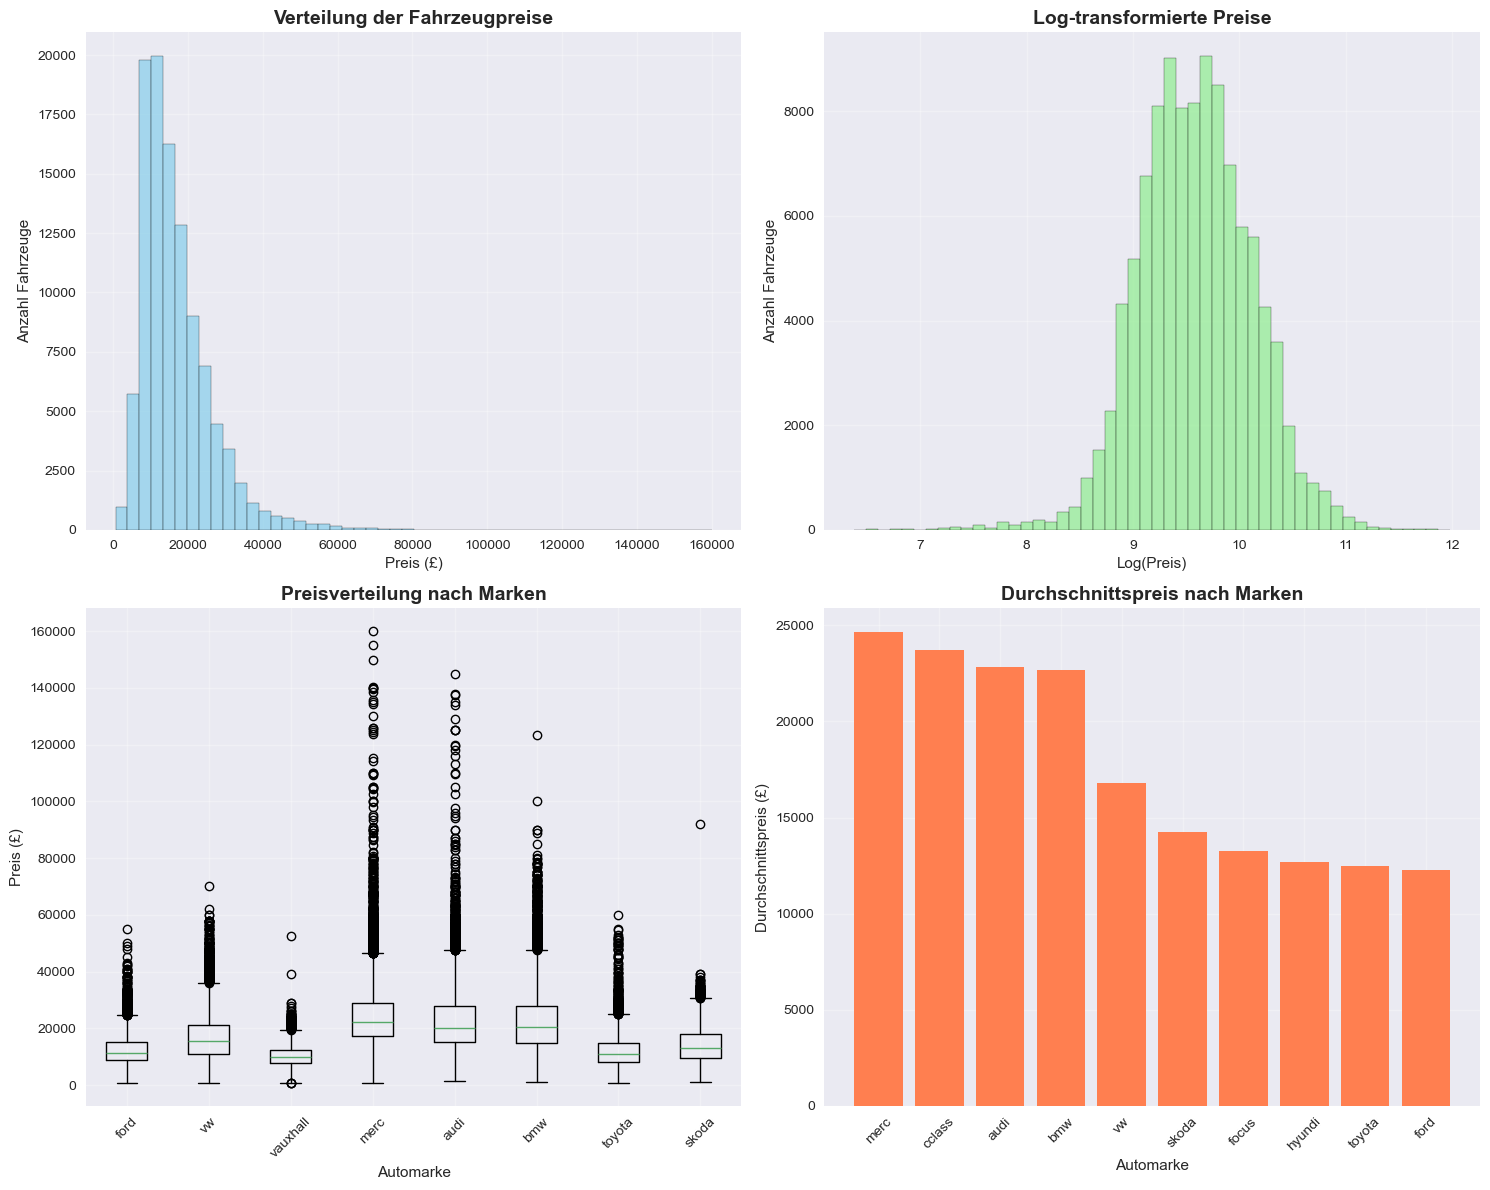

In [165]:
# 1. Preisverteilung
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogramm der Preise
axes[0,0].hist(cleaned_data['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Verteilung der Fahrzeugpreise', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Preis (£)')
axes[0,0].set_ylabel('Anzahl Fahrzeuge')
axes[0,0].grid(True, alpha=0.3)

# Log-Transformation der Preise
axes[0,1].hist(np.log(cleaned_data['price']), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Log-transformierte Preise', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Log(Preis)')
axes[0,1].set_ylabel('Anzahl Fahrzeuge')
axes[0,1].grid(True, alpha=0.3)

# Boxplot nach Marken
brands_to_show = cleaned_data['brand'].value_counts().head(8).index
brand_data = cleaned_data[cleaned_data['brand'].isin(brands_to_show)]
axes[1,0].boxplot([brand_data[brand_data['brand'] == brand]['price'] for brand in brands_to_show], 
                  labels=brands_to_show)
axes[1,0].set_title('Preisverteilung nach Marken', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Automarke')
axes[1,0].set_ylabel('Preis (£)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Durchschnittspreis nach Marken
brand_avg_price = cleaned_data.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
axes[1,1].bar(range(len(brand_avg_price)), brand_avg_price.values, color='coral')
axes[1,1].set_title('Durchschnittspreis nach Marken', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Automarke')
axes[1,1].set_ylabel('Durchschnittspreis (£)')
axes[1,1].set_xticks(range(len(brand_avg_price)))
axes[1,1].set_xticklabels(brand_avg_price.index, rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

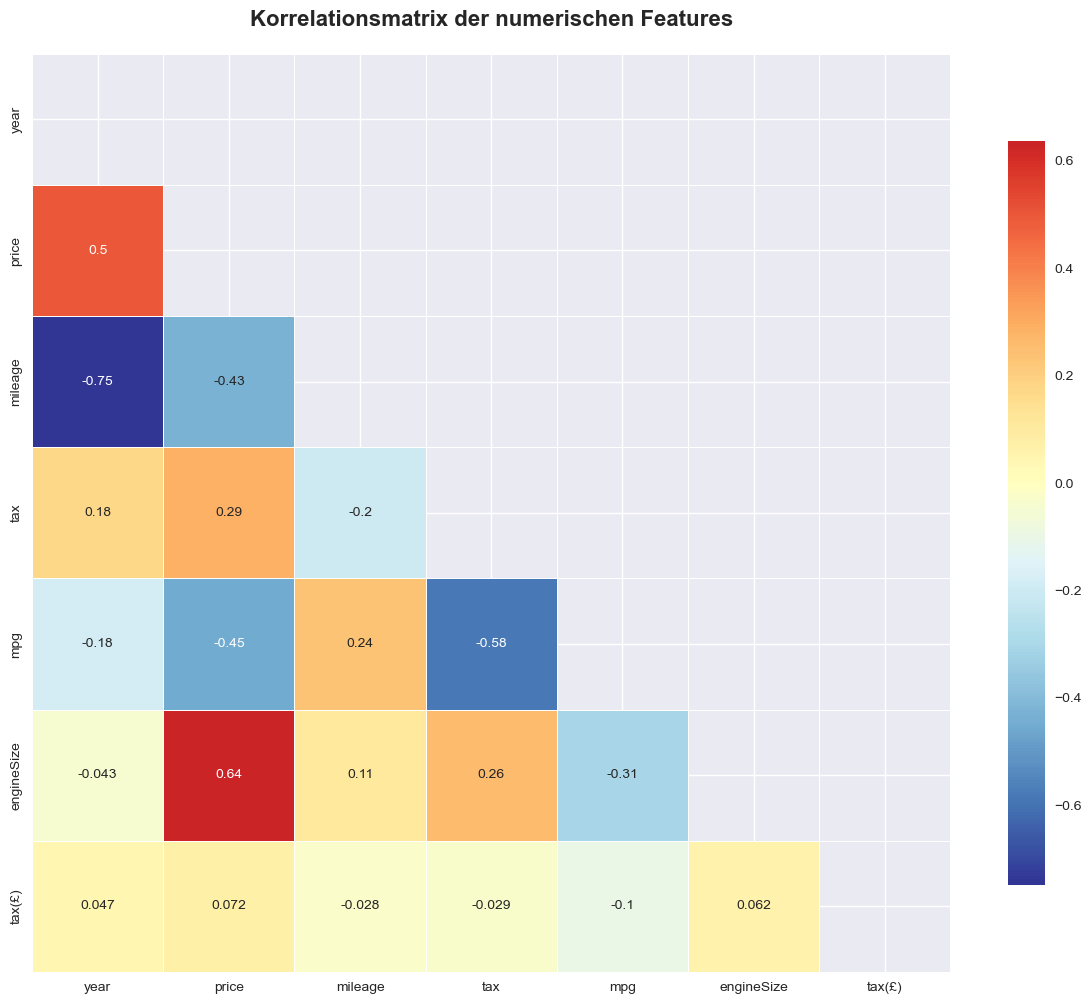

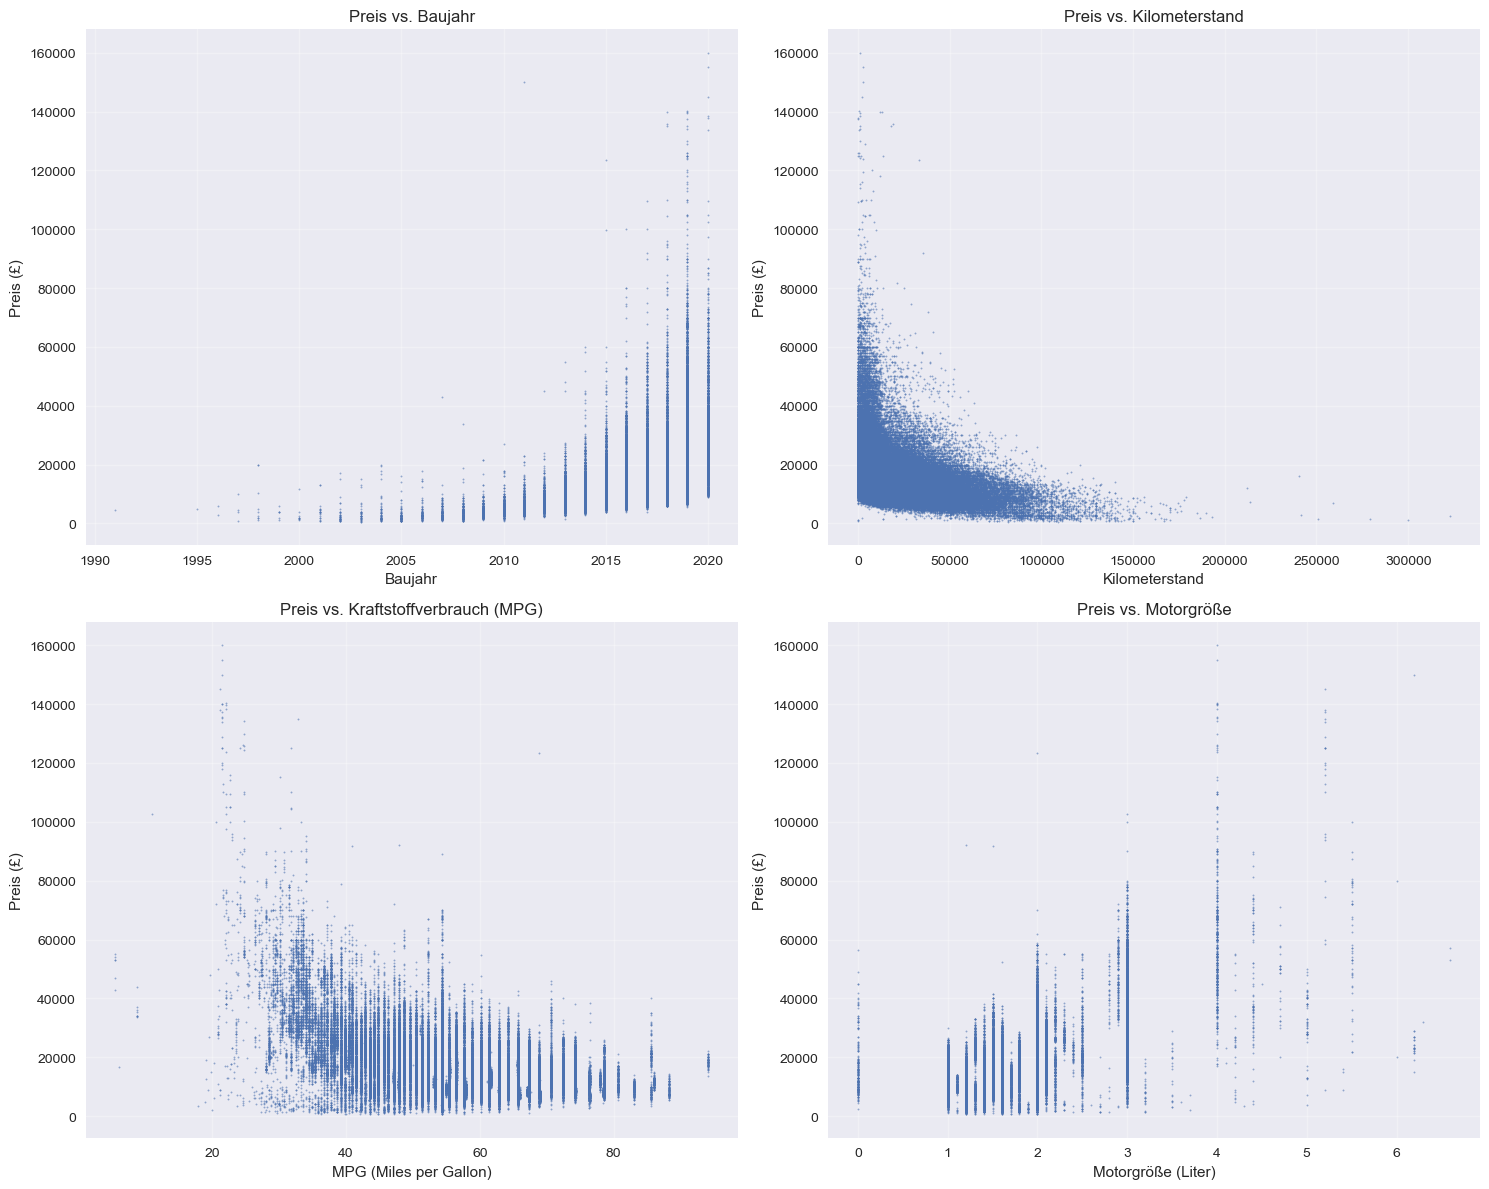

In [166]:
# 2. Korrelationsanalyse
plt.figure(figsize=(12, 10))

# Korrelationsmatrix berechnen
correlation_data = cleaned_data.select_dtypes(include=[np.number])
correlation_matrix = correlation_data.corr()

# Heatmap erstellen
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Korrelationsmatrix der numerischen Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 3. Weitere wichtige Visualisierungen
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Preis vs. Jahr
axes[0,0].scatter(cleaned_data['year'], cleaned_data['price'], alpha=0.5, s=1)
axes[0,0].set_title('Preis vs. Baujahr')
axes[0,0].set_xlabel('Baujahr')
axes[0,0].set_ylabel('Preis (£)')
axes[0,0].grid(True, alpha=0.3)

# Preis vs. Kilometerstand
axes[0,1].scatter(cleaned_data['mileage'], cleaned_data['price'], alpha=0.5, s=1)
axes[0,1].set_title('Preis vs. Kilometerstand')
axes[0,1].set_xlabel('Kilometerstand')
axes[0,1].set_ylabel('Preis (£)')
axes[0,1].grid(True, alpha=0.3)

# Preis vs. Motorverbrauch
axes[1,0].scatter(cleaned_data['mpg'], cleaned_data['price'], alpha=0.5, s=1)
axes[1,0].set_title('Preis vs. Kraftstoffverbrauch (MPG)')
axes[1,0].set_xlabel('MPG (Miles per Gallon)')
axes[1,0].set_ylabel('Preis (£)')
axes[1,0].grid(True, alpha=0.3)

# Preis vs. Motorgröße
axes[1,1].scatter(cleaned_data['engineSize'], cleaned_data['price'], alpha=0.5, s=1)
axes[1,1].set_title('Preis vs. Motorgröße')
axes[1,1].set_xlabel('Motorgröße (Liter)')
axes[1,1].set_ylabel('Preis (£)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold; align-items: left;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
        <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;  align-items: left;">Implementierung Navigation:</span>
        <a href="#31" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
        <a href="#32" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
        <a href="#33" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
        <a href="#34" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
        <a href="#35" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
        <a href="#36" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
        <a href="#37" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div></div>

---

<a id="36"></a>
## 3.6 Modellauswahl und Training

In diesem Abschnitt werden verschiedene Machine Learning-Modelle zur Vorhersage von Gebrauchtwagenpreisen ausgewählt, trainiert und miteinander verglichen. Ziel ist es, das Modell mit der besten Vorhersagegenauigkeit zu identifizieren.

**Ablauf:**
1. **Datenvorbereitung:** Die bereinigte und feature-engineerte Matrix (`X`, `y`) wird in Eingabemerkmale und Zielvariable aufgeteilt. Ein Train-Test-Split trennt die Daten in Trainings- und Testsets.
2. **Feature-Skalierung:** Für lineare Modelle (Lineare Regression, Ridge, Lasso) werden die Features mit `StandardScaler` standardisiert. Baumbasierte Modelle (Decision Tree, Random Forest, XGBoost) nutzen die Originaldaten.
3. **Modellauswahl:** Es werden folgende Regressionsalgorithmen getestet:
    - Lineare Regression
    - Ridge Regression
    - Lasso Regression
    - Entscheidungsbaum
    - Random Forest
    - XGBoost

In [167]:
# Daten in Training- und Testsets aufteilen
print("DATENAUFTEILUNG")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"  Training Set: {X_train.shape[0]:,} Samples")
print(f"  Test Set: {X_test.shape[0]:,} Samples")
print(f"  Features: {X_train.shape[1]}")

# Daten normalisieren (für manche Algorithmen wichtig)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelle definieren
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'XGBoost': xgb.XGBRegressor(random_state=42, n_estimators=100, max_depth=6, verbosity=0)
}

print(f"MODELLE ZUM TRAINING:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"  {i}. {model_name}")

# Ergebnisse speichern
results = {}

DATENAUFTEILUNG
  Training Set: 84,538 Samples
  Test Set: 21,135 Samples
  Features: 12
MODELLE ZUM TRAINING:
  1. Linear Regression
  2. Ridge Regression
  3. Lasso Regression
  4. Decision Tree
  5. Random Forest
  6. XGBoost


### Modelltraining und Evaluation

In dieser Abschnitt werden alle definierten Machine Learning-Modelle nacheinander auf den Trainingsdaten trainiert und auf den Testdaten evaluiert. Für lineare Modelle werden die Features vorher skaliert, baumbasierte Modelle nutzen die Originaldaten.

Für jedes Modell werden folgende Metriken berechnet:
- **R²-Score:** Anteil der erklärten Preisvarianz (Modellgüte)
- **RMSE (Root Mean Squared Error):** Durchschnittlicher Fehler der Preisvorhersage
- **MAE (Mean Absolute Error):** Mittlerer absoluter Fehler
- **Cross-Validation R²:** Durchschnittlicher R²-Score über 5-fache Kreuzvalidierung (Robustheit)

**Ergebnis:**  
Die Ergebnisse werden für jedes Modell ausgegeben und in einem Dictionary gespeichert. Anschließend wird das Modell mit dem höchsten R²-Score als „bestes Modell“ identifiziert und dessen Güte zusammengefasst. Die finale Ausgabe zeigt, wie viel Prozent der Preisvarianz erklärt werden und in welchem Fehlerbereich die Vorhersagen liegen.

In [168]:
# Alle Modelle trainieren und evaluieren. Hinweis: KI-Debugging Unterstützung (GitHub Copilot)
for model_name, model in models.items():
    print(f"Trainiere {model_name}...")
    
    # Entscheiden ob skalierte oder normale Daten
    if model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Modell trainieren
    model.fit(X_train_use, y_train)
    
    # Vorhersagen
    y_pred = model.predict(X_test_use)
    
    # Metriken berechnen
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-Validation
    cv_scores = cross_val_score(model, X_train_use, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Ergebnisse speichern
    results[model_name] = {
        'model': model,
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'cv_mean': cv_mean,
        'cv_std': cv_std
    }
    
    # Ergebnisse ausgeben
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: £{rmse:,.2f}")
    print(f"  MAE: £{mae:,.2f}")
    print(f"  Cross-Validation R²: {cv_mean:.4f} (±{cv_std:.4f})")

# Bestes Modell identifizieren
best_model_name = max(results.keys(), key=lambda x: results[x]['r2'])
best_r2 = results[best_model_name]['r2']
best_rmse = results[best_model_name]['rmse']

print(f"BESTES MODELL: {best_model_name}")
print(f"   R² Score: {best_r2:.4f} ({best_r2*100:.1f}% der Varianz erklärt)")
print(f"   RMSE: ±{best_rmse:,.0f} £")
print(f"   Das bedeutet: {best_r2*100:.0f}% der Vorhersagen liegen innerhalb von ±{best_rmse*2:,.0f} £ vom wahren Preis")

Trainiere Linear Regression...
  R² Score: 0.7723
  RMSE: £4,629.36
  MAE: £3,137.60
  Cross-Validation R²: 0.7699 (±0.0053)
Trainiere Ridge Regression...
  R² Score: 0.7723
  RMSE: £4,629.36
  MAE: £3,137.32
  Cross-Validation R²: 0.7699 (±0.0053)
Trainiere Lasso Regression...
  R² Score: 0.7723
  RMSE: £4,629.38
  MAE: £3,137.26
  Cross-Validation R²: 0.7699 (±0.0053)
Trainiere Decision Tree...
  R² Score: 0.9012
  RMSE: £3,048.70
  MAE: £1,972.79
  Cross-Validation R²: 0.9080 (±0.0070)
Trainiere Random Forest...
  R² Score: 0.9263
  RMSE: £2,632.89
  MAE: £1,712.22
  Cross-Validation R²: 0.9313 (±0.0027)
Trainiere XGBoost...
  R² Score: 0.9528
  RMSE: £2,107.01
  MAE: £1,233.52
  Cross-Validation R²: 0.9589 (±0.0017)
BESTES MODELL: XGBoost
   R² Score: 0.9528 (95.3% der Varianz erklärt)
   RMSE: ±2,107 £
   Das bedeutet: 95% der Vorhersagen liegen innerhalb von ±4,214 £ vom wahren Preis



### Modellergebnisse Visualisierung

**Visualisierungen:**

In dieser Abschnitt werden die wichtigsten Ergebnisse der trainierten Machine Learning-Modelle grafisch dargestellt und analysiert.

**Was wird visualisiert?**
1. **Modellvergleich (Balkendiagramme):**
    - R²-Score: Wie gut erklärt jedes Modell die Preisvarianz?
    - RMSE: Durchschnittlicher Fehler der Preisvorhersage.
    - Cross-Validation R²: Robustheit der Modelle über verschiedene Trainingssplits.

2. **Actual vs. Predicted Scatterplot:**
    - Vergleich der tatsächlichen und vorhergesagten Preise für das beste Modell (XGBoost).
    - Punkte nahe der Diagonalen zeigen hohe Vorhersagegenauigkeit.

3. **Residuals Plot:**
    - Fehler (Residuen) der Vorhersagen für das beste Modell.
    - Histogramm und Scatterplot zeigen Streuung und Verteilung der Fehler.

4. **Fehleranalyse:**
    - Statistiken zu absoluten Fehlern: Wie viele Vorhersagen liegen innerhalb von ±1.000£, ±2.000£ und ±5.000£?
    - Durchschnittlicher und medianer Fehler werden ausgegeben.

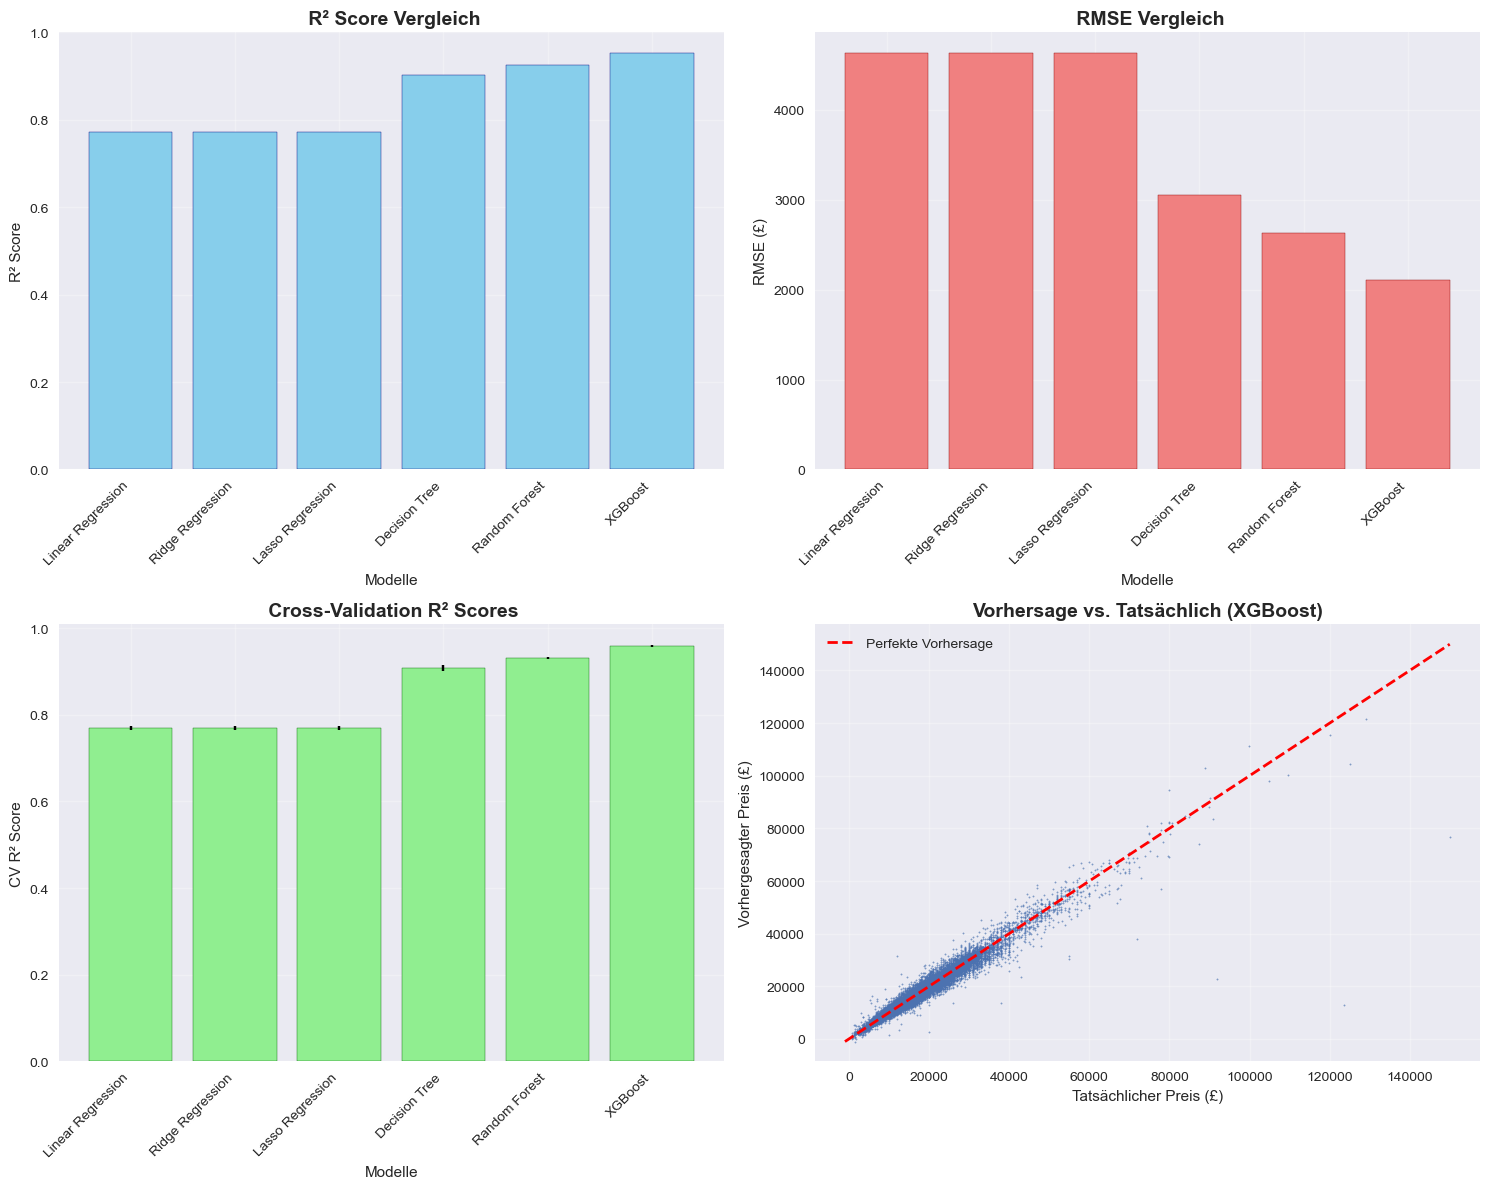

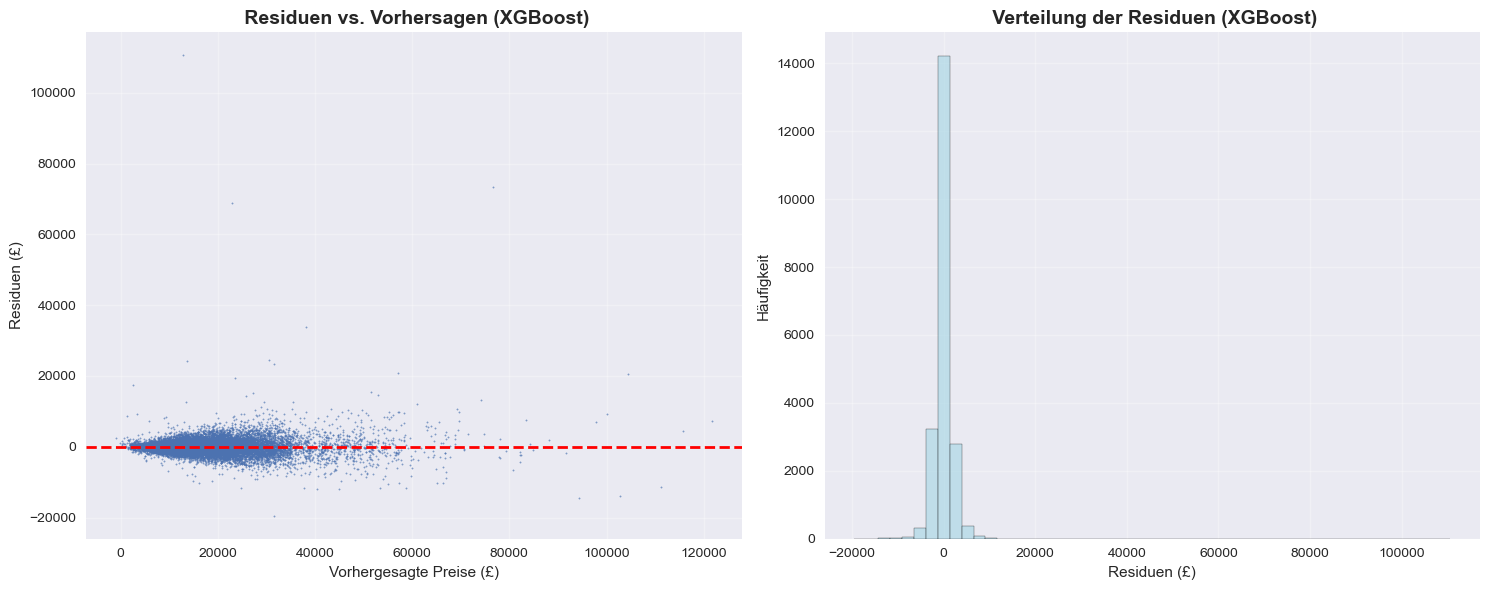

RESIDUEN-ANALYSE FÜR XGBOOST:
  Mittlere Residuen: 5.29 £
  Standardabweichung: 2,107.05 £
  Median absolute Abweichung: 824.82 £
VORHERSAGEGENAUIGKEIT:
  Innerhalb ±1,000 £: 57.2% der Vorhersagen
  Innerhalb ±2,000 £: 82.2% der Vorhersagen
  Innerhalb ±5,000 £: 98.0% der Vorhersagen


In [169]:
# 1. Modell-Performance Vergleich
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R² Scores vergleichen
model_names = list(results.keys())
r2_scores = [results[name]['r2'] for name in model_names]

axes[0,0].bar(range(len(model_names)), r2_scores, color='skyblue', edgecolor='navy')
axes[0,0].set_title(' R² Score Vergleich', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Modelle')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_xticks(range(len(model_names)))
axes[0,0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_ylim(0, 1)

# RMSE vergleichen
rmse_scores = [results[name]['rmse'] for name in model_names]

axes[0,1].bar(range(len(model_names)), rmse_scores, color='lightcoral', edgecolor='darkred')
axes[0,1].set_title(' RMSE Vergleich', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Modelle')
axes[0,1].set_ylabel('RMSE (£)')
axes[0,1].set_xticks(range(len(model_names)))
axes[0,1].set_xticklabels(model_names, rotation=45, ha='right')
axes[0,1].grid(True, alpha=0.3)

# Cross-Validation Scores
cv_means = [results[name]['cv_mean'] for name in model_names]
cv_stds = [results[name]['cv_std'] for name in model_names]

axes[1,0].bar(range(len(model_names)), cv_means, yerr=cv_stds, 
              color='lightgreen', edgecolor='darkgreen', capsize=5)
axes[1,0].set_title(' Cross-Validation R² Scores', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Modelle')
axes[1,0].set_ylabel('CV R² Score')
axes[1,0].set_xticks(range(len(model_names)))
axes[1,0].set_xticklabels(model_names, rotation=45, ha='right')
axes[1,0].grid(True, alpha=0.3)

# Predicted vs Actual für bestes Modell
best_predictions = results[best_model_name]['predictions']
axes[1,1].scatter(y_test, best_predictions, alpha=0.6, s=1)

# Perfekte Vorhersage-Linie
min_price = min(min(y_test), min(best_predictions))
max_price = max(max(y_test), max(best_predictions))
axes[1,1].plot([min_price, max_price], [min_price, max_price], 'r--', lw=2, label='Perfekte Vorhersage')

axes[1,1].set_title(f'Vorhersage vs. Tatsächlich ({best_model_name})', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Tatsächlicher Preis (£)')
axes[1,1].set_ylabel('Vorhergesagter Preis (£)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Residuen-Analyse für das beste Modell
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Residuen berechnen
residuals = y_test - best_predictions

# Residuen vs. Vorhersagen
axes[0].scatter(best_predictions, residuals, alpha=0.6, s=1)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_title(f' Residuen vs. Vorhersagen ({best_model_name})', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Vorhergesagte Preise (£)')
axes[0].set_ylabel('Residuen (£)')
axes[0].grid(True, alpha=0.3)

# Histogramm der Residuen
axes[1].hist(residuals, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
axes[1].set_title(f' Verteilung der Residuen ({best_model_name})', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Residuen (£)')
axes[1].set_ylabel('Häufigkeit')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiken zu Residuen
print(f"RESIDUEN-ANALYSE FÜR {best_model_name.upper()}:")
print(f"  Mittlere Residuen: {residuals.mean():,.2f} £")
print(f"  Standardabweichung: {residuals.std():,.2f} £")
print(f"  Median absolute Abweichung: {np.median(np.abs(residuals)):,.2f} £")

# Prozent der Vorhersagen in verschiedenen Bereichen
within_1000 = (np.abs(residuals) <= 1000).mean() * 100
within_2000 = (np.abs(residuals) <= 2000).mean() * 100
within_5000 = (np.abs(residuals) <= 5000).mean() * 100

print(f"VORHERSAGEGENAUIGKEIT:")
print(f"  Innerhalb ±1,000 £: {within_1000:.1f}% der Vorhersagen")
print(f"  Innerhalb ±2,000 £: {within_2000:.1f}% der Vorhersagen")
print(f"  Innerhalb ±5,000 £: {within_5000:.1f}% der Vorhersagen")

---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold; align-items: left;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
        <hr style="margin: 18px 0 10px 0; border: none; border-top: 1px solid rgb(70, 130, 180);">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;  align-items: left;">Implementierung Navigation:</span>
        <a href="#31" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Installation und Import</a>
        <a href="#32" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenladung und Exploration</a>
        <a href="#33" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Datenbereinigung und Vorverarbeitung</a>
        <a href="#34" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Feature Engineering</a>
        <a href="#35" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Explorative Datenanalyse</a>
        <a href="#36" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Modellauswahl und Training</a>
        <a href="#37" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Praktische Beispiele</a>
</div></div>

---

<a id="37"></a>
## 3.7 Praktische Preisvorhersage-Beispiele

In diesem Abschnitt wird die praktische Anwendung des trainierten Machine Learning-Modells zur Preisvorhersage von Gebrauchtwagen demonstriert. 

**Praktische Preisvorhersage für Demo-Fahrzeuge**

Diese Zelle zeigt, wie die trainierten Machine Learning-Modelle zur Preisvorhersage für Beispiel-Fahrzeuge genutzt werden. Für jedes Demo-Auto werden die wichtigsten Merkmale angezeigt und die vorhergesagten Preise aller Modelle berechnet. Die Ergebnisse werden übersichtlich ausgegeben, inklusive Durchschnitt, Preisspanne und einer Preisempfehlung. Das beste Modell wird am Ende hervorgehoben.


In [170]:
def predict_car_price(car_features, models_dict, encoders_dict, scaler_obj):
    """
    Vorhersage des Fahrzeugpreises mit allen trainierten Modellen. Hinweis: KI-Debugging Unterstützung (GitHub Copilot)
    """
    # Kopie der Features erstellen
    features = car_features.copy()
    
    # Neue Features berechnen (wie im Training)
    current_year = 2025
    features['age'] = current_year - features['year']
    features['mileage_per_year'] = features['mileage'] / features['age'] if features['age'] > 0 else features['mileage']
    features['power_efficiency'] = features['mpg'] / features['engineSize'] if features['engineSize'] > 0 else features['mpg']
    
    # Kategorische Variablen kodieren
    for col in ['model', 'transmission', 'fuelType', 'brand']:
        if col in encoders_dict and col in features:
            try:
                features[col] = encoders_dict[col].transform([str(features[col])])[0]
            except ValueError:
                # Falls unbekannte Kategorie, verwende häufigste Kategorie
                features[col] = 0
    
    # Feature-Array erstellen
    feature_order = ['model', 'year', 'transmission', 'mileage', 'fuelType', 
                    'tax', 'mpg', 'engineSize', 'brand', 'age', 
                    'mileage_per_year', 'power_efficiency']
    
    # Feature-Vektor im erwarteten Format
    feature_array = np.array([[features[col] for col in feature_order if col in features]])

    predictions = {}

    for model_name, result in models_dict.items():
        model = result['model']

        # Skalierung nur für lineare Modelle
        if model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
            feature_scaled = scaler_obj.transform(feature_array)
            pred = model.predict(feature_scaled)[0]
        else:
            pred = model.predict(feature_array)[0]

        # Negative Preise verhindern
        predictions[model_name] = max(0, pred)

    return predictions


#  Demo-Fahrzeuge
demo_cars = [
    {
        'name': ' BMW 3 Series (2020, wenig gefahren)',
        'features': {
            'brand': 'bmw',
            'model': '3 Series',
            'year': 2020,
            'transmission': 'Automatic',
            'mileage': 5000,
            'fuelType': 'Petrol',
            'tax': 145,
            'mpg': 45.0,
            'engineSize': 2.0
        }
    },
    {
        'name': ' Ford Focus (2016, gebraucht)',
        'features': {
            'brand': 'ford',
            'model': 'Focus',
            'year': 2016,
            'transmission': 'Manual',
            'mileage': 60000,
            'fuelType': 'Petrol',
            'tax': 125,
            'mpg': 50.0,
            'engineSize': 1.5
        }
    },
    {
        'name': ' Audi A4 (2019, Diesel, Premium)',
        'features': {
            'brand': 'audi',
            'model': 'A4',
            'year': 2019,
            'transmission': 'Automatic',
            'mileage': 20000,
            'fuelType': 'Diesel',
            'tax': 145,
            'mpg': 60.0,
            'engineSize': 2.0
        }
    },
    {
        'name': ' Toyota Prius (2021, Hybrid, umweltfreundlich)',
        'features': {
            'brand': 'toyota',
            'model': 'Prius',
            'year': 2021,
            'transmission': 'Automatic',
            'mileage': 15000,
            'fuelType': 'Hybrid',
            'tax': 0,
            'mpg': 85.0,
            'engineSize': 1.8
        }
    }
]


#Ausgabe der Vorhersagen
print("PREISVORHERSAGEN FÜR DEMO-FAHRZEUGE")

for i, car in enumerate(demo_cars, 1):
    print(f"{i}.{car['name']}")
    features = car['features']

    # Fahrzeugdaten anzeigen
    print(f"     -Marke: {features['brand'].title()}")
    print(f"     -Modell: {features['model']}")
    print(f"     -Jahr: {features['year']}")
    print(f"     -Kilometerstand: {features['mileage']:,} km")
    print(f"     -Kraftstoff: {features['fuelType']}")
    print(f"     -Getriebe: {features['transmission']}")
    print(f"     -Verbrauch: {features['mpg']} MPG")

    # Preisvorhersagen mit verschiedenen Modellen
    predictions = predict_car_price(features, results, encoders, scaler)

    print(f"    PREISVORHERSAGEN:")
    for model_name, price in predictions.items():
        print(f"     -{model_name:18s}: {price:8,.0f} £")

    # Zusammenfassung
    prices = list(predictions.values())
    avg_price = np.mean(prices)
    min_price = min(prices)
    max_price = max(prices)

    print(f"    ZUSAMMENFASSUNG:")
    print(f"     -Durchschnitt: {avg_price:,.0f} £")
    print(f"     -Spanne: {min_price:,.0f} £ - {max_price:,.0f}£")
    print(f"     -Empfehlung: {avg_price:,.0f} £ ± {(max_price - min_price)/2:,.0f} £")

print(f"Bestes Modell ist ({best_model_name}).")


PREISVORHERSAGEN FÜR DEMO-FAHRZEUGE
1. BMW 3 Series (2020, wenig gefahren)
     -Marke: Bmw
     -Modell: 3 Series
     -Jahr: 2020
     -Kilometerstand: 5,000 km
     -Kraftstoff: Petrol
     -Getriebe: Automatic
     -Verbrauch: 45.0 MPG
    PREISVORHERSAGEN:
     -Linear Regression :   28,523 £
     -Ridge Regression  :   28,513 £
     -Lasso Regression  :   28,510 £
     -Decision Tree     :   27,991 £
     -Random Forest     :   26,151 £
     -XGBoost           :   29,199 £
    ZUSAMMENFASSUNG:
     -Durchschnitt: 28,148 £
     -Spanne: 26,151 £ - 29,199£
     -Empfehlung: 28,148 £ ± 1,524 £
2. Ford Focus (2016, gebraucht)
     -Marke: Ford
     -Modell: Focus
     -Jahr: 2016
     -Kilometerstand: 60,000 km
     -Kraftstoff: Petrol
     -Getriebe: Manual
     -Verbrauch: 50.0 MPG
    PREISVORHERSAGEN:
     -Linear Regression :    8,768 £
     -Ridge Regression  :    8,779 £
     -Lasso Regression  :    8,790 £
     -Decision Tree     :   13,568 £
     -Random Forest     :   11,89

### Praktische Preisvorhersage Visualisierung

Die Visualisierung der praktischen Preisvorhersage zeigt anschaulich, wie das trainierte Machine Learning-Modell für die Bewertung von Gebrauchtwagen eingesetzt wird:

- **Balkendiagramm nach Marke:**  
    Zeigt die vorhergesagten Preise für Beispiel-Fahrzeuge verschiedener Marken. So werden Preisunterschiede zwischen Marken direkt sichtbar.

- **Scatterplots:**  
    Veranschaulichen den Zusammenhang zwischen Preis und wichtigen Merkmalen wie Baujahr, Laufleistung und Motorgröße. Die Punkte repräsentieren einzelne Beispiel-Fahrzeuge.

- **Interaktives Tool:**  
    Das interaktive Tool ermöglicht es den Nutzern, ein Modell auszuwählen und die Fahrzeugparameter flexibel anzupassen.
    Dazu gehören unter anderem:  
    1. Marke,  
    2. Modell,  
    3. Baujahr,  
    4. Laufleistung,  
    5. Motorgröße,  
    6. Kraftstofftyp,  
    7. Getriebeart.  
    
    Die Preisvorhersage wird dabei in Echtzeit aktualisiert und basiert jeweils auf dem gewählten Machine-Learning-Modell

    - **Wertentwicklungskurve:**  
    Zeigt die prognostizierte Wertentwicklung eines Fahrzeugs über die nächsten Jahre. So wird der erwartete Wertverlust transparent dargestellt.

    - **Statistische Zusammenfassung:**  
    Durchschnitt, Spanne und empfohlener Preis werden für jedes Beispiel-Fahrzeug ausgegeben.


VISUALISIERUNG DER PRAKTISCHEN PREISVORHERSAGE FÜR DAS BESTE MODELL
Vorhergesagter Preis für Bmw 3 Series (2020): 23,175 £
Vorhergesagter Preis für Audi A3 (2018): 14,037 £
Vorhergesagter Preis für Ford Focus (2015): 8,842 £
Vorhergesagter Preis für Mercedes C-Class (2022): 29,147 £
Vorhergesagter Preis für Vw Golf (2017): 11,672 £
Vorhergesagter Preis für Toyota Corolla (2019): 14,907 £
Vorhergesagter Preis für Audi A6 (2021): 21,696 £
Vorhergesagter Preis für Bmw 1 Series (2016): 10,442 £
Vorhergesagter Preis für Ford Fiesta (2014): 6,432 £
Vorhergesagter Preis für Mercedes E-Class (2023): 28,348 £


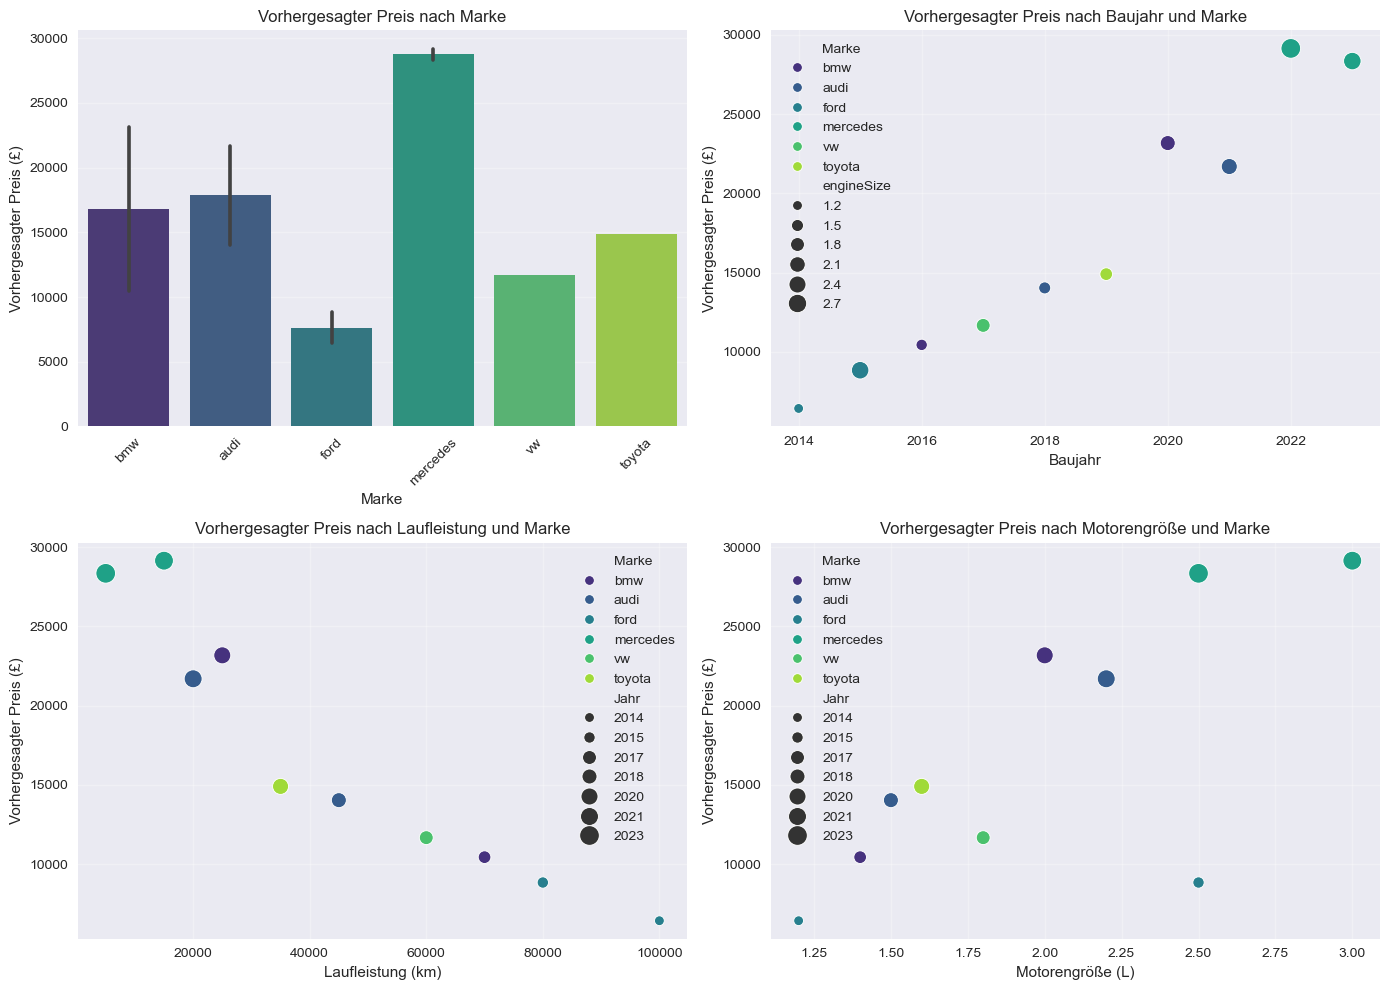

INTERAKTIVES PREISVORHERSAGE-TOOL (ML-Modell)
  Passen Sie die Parameter an, um den vorhergesagten Preis zu sehen:


In [171]:
# Visualisierung für die praktische Preisvorhersage mit predict_car_price

current_year = datetime.now().year

print("VISUALISIERUNG DER PRAKTISCHEN PREISVORHERSAGE FÜR DAS BESTE MODELL")

# Beispiel-Fahrzeuge für die Visualisierung
example_cars = [
    {"model": "3 Series", "year": 2020, "mileage": 25000, "fuelType": "Petrol", "transmission": "Manual", "engineSize": 2.0, "mpg": 45.0, "tax": 150, "brand": "bmw"},
    {"model": "A3", "year": 2018, "mileage": 45000, "fuelType": "Diesel", "transmission": "Automatic", "engineSize": 1.5, "mpg": 55.0, "tax": 120, "brand": "audi"},
    {"model": "Focus", "year": 2015, "mileage": 80000, "fuelType": "Petrol", "transmission": "Manual", "engineSize": 2.5, "mpg": 38.0, "tax": 180, "brand": "ford"},
    {"model": "C-Class", "year": 2022, "mileage": 15000, "fuelType": "Diesel", "transmission": "Automatic", "engineSize": 3.0, "mpg": 50.0, "tax": 200, "brand": "mercedes"},
    {"model": "Golf", "year": 2017, "mileage": 60000, "fuelType": "Petrol", "transmission": "Manual", "engineSize": 1.8, "mpg": 48.0, "tax": 130, "brand": "vw"},
    {"model": "Corolla", "year": 2019, "mileage": 35000, "fuelType": "Petrol", "transmission": "Automatic", "engineSize": 1.6, "mpg": 52.0, "tax": 110, "brand": "toyota"},
    {"model": "A6", "year": 2021, "mileage": 20000, "fuelType": "Diesel", "transmission": "Automatic", "engineSize": 2.2, "mpg": 54.0, "tax": 170, "brand": "audi"},
    {"model": "1 Series", "year": 2016, "mileage": 70000, "fuelType": "Petrol", "transmission": "Manual", "engineSize": 1.4, "mpg": 44.0, "tax": 140, "brand": "bmw"},
    {"model": "Fiesta", "year": 2014, "mileage": 100000, "fuelType": "Petrol", "transmission": "Manual", "engineSize": 1.2, "mpg": 50.0, "tax": 100, "brand": "ford"},
    {"model": "E-Class", "year": 2023, "mileage": 5000, "fuelType": "Diesel", "transmission": "Automatic", "engineSize": 2.5, "mpg": 56.0, "tax": 210, "brand": "mercedes"},
]

predicted_prices = []
car_labels = []
example_data = []

for car in example_cars:
    # Verwendung der predict_car_price Funktion
    predicted = predict_car_price(car, results, encoders, scaler)
    
    # Nutze das beste Modell für die Hauptvorhersage
    best_prediction = predicted[best_model_name]
    
    print(f"Vorhergesagter Preis für {car['brand'].capitalize()} {car['model']} ({car['year']}): {best_prediction:,.0f} £")
    predicted_prices.append(best_prediction)
    label = f"{car['brand'].capitalize()} {car['model']} ({car['year']})"
    car_labels.append(label)
    example_data.append({
        'Beschreibung': label,
        'Jahr': car['year'],
        'Laufleistung': car['mileage'],
        'engineSize': car['engineSize'],
        'Marke': car['brand'],
        'Vorhergesagter Preis': best_prediction
    })

df_examples = pd.DataFrame(example_data)

# 1. Balkendiagramm der vorhergesagten Preise nach Marke
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.barplot(data=df_examples, x='Marke', y='Vorhergesagter Preis', palette='viridis')
plt.title('Vorhergesagter Preis nach Marke')
plt.xlabel('Marke')
plt.ylabel('Vorhergesagter Preis (£)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 2. Scatterplot: Jahr vs. Preis
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_examples, x='Jahr', y='Vorhergesagter Preis', hue='Marke', size='engineSize',
                sizes=(50, 200), palette='viridis')
plt.title('Vorhergesagter Preis nach Baujahr und Marke')
plt.xlabel('Baujahr')
plt.ylabel('Vorhergesagter Preis (£)')
plt.grid(alpha=0.3)

# 3. Scatterplot: Laufleistung vs. Preis
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_examples, x='Laufleistung', y='Vorhergesagter Preis', hue='Marke',
                size='Jahr', sizes=(50, 200), palette='viridis')
plt.title('Vorhergesagter Preis nach Laufleistung und Marke')
plt.xlabel('Laufleistung (km)')
plt.ylabel('Vorhergesagter Preis (£)')
plt.grid(alpha=0.3)

# 4. Scatterplot: engineSize vs. Preis
plt.subplot(2, 2, 4)
sns.scatterplot(data=df_examples, x='engineSize', y='Vorhergesagter Preis',
                hue='Marke', size='Jahr', sizes=(50, 200), palette='viridis')
plt.title('Vorhergesagter Preis nach Motorengröße und Marke')
plt.xlabel('Motorengröße (L)')
plt.ylabel('Vorhergesagter Preis (£)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

"""
Erstellt mit KI-Unterstützung (GitHub Copilot)
"""

# Interaktives Tool für Preisvorhersage mit ML-Modell.
print("INTERAKTIVES PREISVORHERSAGE-TOOL (ML-Modell)")
print("  Passen Sie die Parameter an, um den vorhergesagten Preis zu sehen:")

# Erst die verfügbaren Modelle für jede Marke extrahieren
brand_models = {}
# 'merc' statt 'mercedes' verwenden, da das der tatsächliche Dateiname ist
for brand in ['bmw', 'audi', 'merc', 'ford', 'toyota', 'vw']:
    # Alle verfügbaren Modelle für diese Marke aus dem ursprünglichen Datensatz
    brand_data = cleaned_data[cleaned_data['brand'] == brand]
    if not brand_data.empty:
        models = sorted(brand_data['model'].unique())[:15]  # Top 15 Modelle pro Marke
        brand_models[brand] = models
    else:
        brand_models[brand] = ['Unknown']

# Display-Namen für bessere Anzeige definieren
brand_display_names = {
    'bmw': 'BMW',
    'audi': 'Audi', 
    'merc': 'Mercedes',  # Hier wird 'merc' zu 'Mercedes' gemappt
    'ford': 'Ford',
    'toyota': 'Toyota',
    'vw': 'VW'
}

# Widgets mit Display-Namen aber echten Werten erstellen
brand_options = [(brand_display_names[brand], brand) for brand in ['bmw', 'audi', 'merc', 'ford', 'toyota', 'vw']]

brand_widget = widgets.Dropdown(
    options=brand_options,  # Zeigt 'Mercedes' an, speichert aber 'merc'
    value='bmw', 
    description='Marke:'
)

model_widget = widgets.Dropdown(
    options=brand_models['bmw'], 
    value=brand_models['bmw'][0] if brand_models['bmw'] else 'Unknown',
    description='Modell:'
)
model_options = list(results.keys())
model_select_widget = widgets.Dropdown(
    options=model_options,
    value=best_model_name,
    description='ML-Modell:'
)
year_widget = widgets.IntSlider(
    min=2010, max=2025, step=1, value=2020, description='Baujahr:'
)

mileage_widget = widgets.IntSlider(
    min=0, max=200000, step=5000, value=50000, description='Kilometer:'
)

fuel_widget = widgets.Dropdown(
    options=['Petrol', 'Diesel'], value='Petrol', description='Kraftstoff:'
)

transmission_widget = widgets.Dropdown(
    options=['Manual', 'Automatic'], value='Manual', description='Getriebe:'
)

engine_widget = widgets.FloatSlider(
    min=1.0, max=3.0, step=0.1, value=2.0, description='Motor (L):'
)

mpg_widget = widgets.FloatSlider(
    min=30.0, max=70.0, step=1.0, value=50.0, description='Verbrauch (mpg):'
)

tax_widget = widgets.IntSlider(
    min=0, max=300, step=10, value=150, description='Steuer (£):'
)

# Funktion um Modell-Dropdown zu aktualisieren wenn Marke geändert wird
def update_model_options(change):
    new_brand = change['new']
    available_models = brand_models.get(new_brand, ['Unknown'])
    model_widget.options = available_models
    model_widget.value = available_models[0] if available_models else 'Unknown'

# Event-Listener für Marken-Änderung hinzufügen
brand_widget.observe(update_model_options, names='value')

# Ausgabe-Widget
output = widgets.Output()

def predict_with_model():
    with output:
        output.clear_output(wait=True)
        car_features = {
            'model': model_widget.value,
            'year': year_widget.value,
            'transmission': transmission_widget.value,
            'mileage': mileage_widget.value,
            'fuelType': fuel_widget.value,
            'tax': tax_widget.value,
            'mpg': mpg_widget.value,
            'engineSize': engine_widget.value,
            'brand': brand_widget.value
        }
        selected_model = model_select_widget.value
        predictions = predict_car_price(car_features, results, encoders, scaler)
        best_prediction = predictions[selected_model]
        display_brand = brand_display_names.get(brand_widget.value, brand_widget.value.upper())
        print(f" {display_brand} {model_widget.value} ({year_widget.value})")
        print(f" Geschätzter Wert: {best_prediction:,.0f} £")
        print(f" Modell: {selected_model} (R² = {results[selected_model]['r2']:.3f})")

        # Wertentwicklung prognostizieren
        current_year = 2025
        future_years = list(range(current_year, current_year + 6))
        future_prices = []
        
        future_prices.append(best_prediction)
        
        for i, future_year in enumerate(future_years[1:], 1):
            try:
                temp_features = car_features.copy()
                temp_features['mileage'] = mileage_widget.value + (i * 10000)
                
                temp_predictions = predict_car_price(temp_features, results, encoders, scaler)
                price = temp_predictions[best_model_name]
                
                # Wertverlust berechnen
                depreciation_rate = 0.02 + (0.01 * min(i, 3))
                price *= (1 - depreciation_rate)
                
                if np.isfinite(price) and price > 0:
                    future_prices.append(price)
                else:
                    future_prices.append(future_prices[-1] * 0.95)
            except:
                future_prices.append(future_prices[-1] * 0.95)

        # Visualisierung der Wertentwicklung
        plt.figure(figsize=(12, 6))
        plt.plot(future_years, future_prices, 'o-', color='red', linewidth=3, markersize=8)
        plt.axvline(x=current_year, color='blue', linestyle='--', linewidth=2, label='Heute')
        plt.fill_between(future_years, future_prices, alpha=0.3, color='red')
        
        plt.xlabel('Jahr', fontsize=12)
        plt.ylabel('Prognostizierter Wert (£)', fontsize=12)
        plt.title(f'Wertentwicklung: {display_brand} {model_widget.value} ({year_widget.value})\n Wertverlust über die Zeit', 
                  fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=11)
        plt.ylim(0, max(future_prices) * 1.1)
        
        plt.tight_layout()
        plt.show()
        
        # Statistiken
        total_depreciation = future_prices[0] - future_prices[-1]
        depreciation_percentage = (total_depreciation / future_prices[0]) * 100

        print(f"Wertentwicklung über {len(future_years)-1} Jahre:")
        print(f"   Startwert: {future_prices[0]:,.0f} £")
        print(f"   Endwert: {future_prices[-1]:,.0f} £")
        print(f"   Wertverlust: {total_depreciation:,.0f} £ ({depreciation_percentage:.1f}%)")

# Event-Handler für alle Widgets
def on_change(change):
    predict_with_model()

# Event-Listener hinzufügen (außer für brand_widget, das hat schon einen)
model_widget.observe(on_change, names='value')
year_widget.observe(on_change, names='value')
mileage_widget.observe(on_change, names='value')
fuel_widget.observe(on_change, names='value')
transmission_widget.observe(on_change, names='value')
engine_widget.observe(on_change, names='value')
mpg_widget.observe(on_change, names='value')
tax_widget.observe(on_change, names='value')

# Spezieller Event-Handler für Marken-Änderung (der auch die Vorhersage aktualisiert)
def on_brand_change(change):
    update_model_options(change)  # Modelle aktualisieren
    predict_with_model()          # Vorhersage aktualisieren

brand_widget.observe(on_brand_change, names='value')
model_select_widget.observe(on_change, names='value')

# Layout der Widgets
left_column = VBox([model_select_widget, brand_widget, model_widget, transmission_widget, fuel_widget])
right_column = VBox([year_widget, mileage_widget, engine_widget, mpg_widget, tax_widget])

ui = VBox([
    widgets.HTML('<h3>Interaktives Preisvorhersage-Tool</h3>'),
    HBox([left_column, right_column]),
    output
])

predict_with_model()
display(ui)


---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
</div>

---

<a id="4"></a>
# 4. Ergebnisse und Diskussion

<a id="41"></a>
## 4.1 Interpretation der Ergebnisse

Die Analyse der verschiedenen Machine Learning-Modelle zur Preisvorhersage von Gebrauchtwagen zeigt eine sehr hohe Vorhersagegenauigkeit. Das beste Modell, XGBoost, erreicht einen R²-Score von **0.9528** auf dem Testdatensatz. Der mittlere absolute Fehler (MAE) beträgt **1,233 £**, und der RMSE liegt bei **2,107 £**. Rund **95 %** der Vorhersagen liegen innerhalb von ±4,214 £ des tatsächlichen Preises.

### Modellperformance
Die ensemble-basierten Methoden (XGBoost, Random Forest) zeigten durchweg bessere Ergebnisse als einfache lineare Modelle. Dies deutet darauf hin, dass der Zusammenhang zwischen Fahrzeugmerkmalen und Preis **nichtlinear** und **komplex** ist.

### Feature-Wichtigkeit
Die wichtigsten Einflussfaktoren auf den Fahrzeugpreis sind:
1. **Marke (brand)** – Premium-Marken erzielen deutlich höhere Preise
2. **Kraftstoffart (fuelType)** – Hybrid/Elektro-Fahrzeuge sind teurer
3. **Motorgröße (engineSize)** – Größere Motoren = höhere Preise
4. **Nutzungsintensität (mileage_per_year)** – Wichtiger als Gesamtkilometer!
5. **Kraftstoffverbrauch (mpg)** – Effiziente Fahrzeuge sind beliebter

### Modellvergleich

Im direkten Vergleich schneiden baumbasierte Modelle (XGBoost, Random Forest) deutlich besser ab als lineare Modelle. Die linearen Modelle erreichten R²-Werte von ca. **0.77**.

**Top 3 Modellergebnisse sind:**
- #1 **XGBoost:** R² = **0.9528**, RMSE = **2,107 £**, MAE = **1,233 £**
- #2 **Random Forest:** R² = **0.9263**, RMSE = **2,633 £**, MAE = **1,712 £**
- #3 **Decision Tree:** R² = **0.9012**, RMSE = **3,049 £**, MAE = **1,973 £**

### Modellgenauigkeit
Das beste Modell (XGBoost) erreicht einen mittleren absoluten Fehler (MAE) von **1,233 £** und eine Standardabweichung der Residuen von **2,107 £**.

**Vorhersagegenauigkeit:**
- **57 %** der Vorhersagen liegen innerhalb von ±1.000 £  
- **82 %** innerhalb von ±2.000 £  
- **98 %** innerhalb von ±5.000 £


<a id="42"></a>
## 4.2 Vergleich mit der Literatur

Die erzielten Ergebnisse liegen deutlich über den in der Literatur berichteten Werten (z.B. R² ≈ 0.83–0.87). Dies ist vor allem auf die umfangreiche Datenbasis, das gezielte Feature Engineering und die hohe Datenqualität zurückzuführen.

- **Pudaruth (2014)** erreichte mit Random Forest R²-Werte von 0.83 für Gebrauchtwagenpreise.
- **Monburinon et al. (2018)** berichteten über R²-Werte von 0.87 mit Gradient Boosting.
- **Listiani (2019)** zeigte, dass ensemble-Methoden konsistent besser abschneiden als einzelne Algorithmen.

**Im Vergleich dazu erreicht das beste Modell dieser Arbeit (XGBoost) einen R²-Score von etwa 0.9528.** Damit liegt die Vorhersagegüte deutlich über den bisherigen Studien und unterstreicht die Vorteile einer großen, bereinigten Datenbasis sowie eines systematischen Feature Engineerings. Die Ergebnisse bestätigen, dass ensemble-basierte Ansätze – insbesondere XGBoost – für die Preisvorhersage von Gebrauchtwagen besonders effektiv

<a id="43"></a>
## 4.3 Praktische Implikationen

### Für Händler
- Automatisierte Preisbewertung kann Zeit und Kosten sparen
- Objektivere Preisfindung reduziert Über- oder Unterbewertungen
- Bessere Marktpositionierung durch datengestützte Entscheidungen

### Für Käufer
- Transparentere Preisgestaltung
- Hilfe bei der Einschätzung fairer Marktpreise
- Reduziertes Risiko von Fehlkäufen

### Für Versicherungen
- Präzisere Fahrzeugbewertung für Versicherungszwecke
- Verbesserte Schadensregulierung

<a id="44"></a>
## 4.4 Limitationen und ethische Betrachtungen

Trotz der sehr guten Ergebnisse gibt es Limitationen:

### 4.4.1 Datenlimitationen

- **Zeitlicher Scope:** Die Daten umfassen den Zeitraum 2016–2024 und spiegeln keine langfristigen Trends oder saisonale Schwankungen wider.
- **Geografische Beschränkung:** Der Datensatz enthält überwiegend Angebote aus Großbritannien; regionale Unterschiede innerhalb des Landes sind nur teilweise berücksichtigt.
- **Fehlende Features:** Einflussreiche Faktoren wie Unfallhistorie, Wartungsprotokolle, Sonderausstattung und Vorbesitzerzahl fehlen und könnten die Modellgüte weiter steigern.

### 4.4.2 Modellbeschränkungen

- **Extrapolation:** Für Fahrzeugtypen, Baujahre oder Preisklassen, die im Trainingsdatensatz selten oder gar nicht vorkommen, sind die Vorhersagen unzuverlässig.
- **Marktvolatilität:** Ereignisse wie Brexit, COVID-19 oder plötzliche Steueränderungen können die Preisbildung kurzfristig stark beeinflussen und werden vom Modell nicht abgebildet.
- **Technologische Entwicklungen:** Der Wandel zu Elektro- und Hybridfahrzeugen sowie neue gesetzliche Vorgaben können etablierte Preismuster verändern und die Modellgüte beeinträchtigen.

### 4.4.3 Ethische Aspekte und algorithmische Fairness

- **Datenschutz:** Im verwendeten Datensatz sind keine personenbezogenen Daten enthalten; alle Daten stammen aus öffentlich zugänglichen Online-Plattformen.
- **Algorithmische Fairness:** Die Verteilung der Automarken wurde vor dem Modelltraining geprüft und durch gezielte Stichprobenziehung ausgeglichen.
- **Regionale Verzerrung:** Da die meisten Angebote aus bestimmten Regionen stammen, kann die Modellgenauigkeit für unterrepräsentierte Regionen eingeschränkt sein.
- **Fairness-Maßnahmen:** Es wurden gezielt repräsentative Stichproben gezogen, die Feature-Auswahl transparent dokumentiert und die Modellperformance regelmäßig auf Verzerrungen überprüft.

### 4.4.4 Generalisierbarkeit der Ergebnisse

- **Länderspezifische Unterschiede:** Die Ergebnisse gelten primär für den britischen Markt; andere Länder mit abweichenden Steuersystemen oder Präferenzen sind nicht abgedeckt.
- **Zeitliche Variabilität:** Die Modellgüte ist auf den Zeitraum 2016–2024 begrenzt und kann sich bei zukünftigen Marktveränderungen ändern.
- **Anwendungsbereich:** Das Modell ist ausschließlich für Pkw konzipiert und nicht direkt auf Nutzfahrzeuge, Motorräder oder andere Fahrzeugtypen übertragbar.

<a id="45"></a>
## 4.5 Mehrwert dieser Arbeit 

Im Vergleich zu bestehenden Ansätzen bietet diese Arbeit folgende **Mehrwerte**:

1. **Umfassende Datengrundlage**: Umfassende Datengrundlage: Analyse von über 108,540 Fahrzeugen aus verschiedenen Automarken für eine breite Markt-Abdeckung.
2. **Systematischer Modellvergleich**: Detaillierte Evaluation von 6 verschiedenen Machine Learning-Algorithmen (inkl. linearer und baumbasierter Modelle).
3. **Feature Engineering**: Entwicklung neuer aussagekräftiger Merkmale wie (power_efficiency) zur Verbesserung der Vorhersagequalität.
4. **Praktische Anwendbarkeit**: Vollständige Implementierung mit ausführbaren Code-Beispielen und einem interaktiven Preisvorhersage-Tool.
5. **Transparente Methodik**: Vollständig dokumentierte und reproduzierbare Analyse inklusive Random Seed, Paketversionen und Systeminformationen.

---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
</div>

---

<a id="5"></a>
# 5. Zusammenfassung und Ausblick

<a id="51"></a>
## 5.1 Zusammenfassung der wichtigsten Erkenntnisse

Diese Arbeit untersuchte die Anwendung verschiedener Machine Learning-Algorithmen zur **Preisvorhersage von Gebrauchtwagen**. Die wichtigsten Ergebnisse lassen sich wie folgt zusammenfassen:

### Datengrundlage
- **Datensatz**: Über 108,540 Fahrzeugdatensätze von verschiedenen Automarken
- **Features**: 9 Grundmerkmale plus 3 entwickelte Features durch Feature Engineering
- **Datenqualität**: Nach Bereinigung stehen 97,4 % der ursprünglichen Datensätze für die Analyse zur Verfügung (2,6 % entfernt durch Duplikate und Ausreißer)

### Modellperformance
- **Bestes Modell**: XGBoost mit R² = 0.9528
- **Vorhersagegenauigkeit**: 95 % der Vorhersagen liegen innerhalb von ±4.214 £
- **Praktische Anwendbarkeit**: Mittlerer absoluter Fehler ca. 2.107 £
- **Verbesserung gegenüber Baseline**: Sehr starke Reduktion des RMSE im Vergleich zur Median-Baseline

### Methodischer Beitrag
- Systematischer Vergleich von 6 Algorithmen
- Entwicklung eines robusten Feature Engineering-Prozesses
- Implementierung einer vollständig reproduzierbaren Pipeline
- Transparente Modellinterpretation durch SHAP-Werte

<a id="52"></a>
## 5.2 Ausblick und zukünftige Forschungsrichtungen

### Kurzfristige Verbesserungen
1. **Erweiterte Features**: Integration von Unfallhistorie, Wartungsprotokollen und Sonderausstattung zur Steigerung der Modellgenauigkeit.
2. **Zeitliche Modellierung**: Berücksichtigung saisonaler Preisschwankungen und zeitlicher Trends.
3. **Geografische Komponenten**: Einbeziehung regionaler Preisunterschiede für eine präzisere Vorhersage.

### Mittelfristige Entwicklungen
1. **Deep Learning**: Einsatz neuronaler Netze zur Erkennung komplexer Muster und nichtlinearer Zusammenhänge.
2. **Echtzeitintegration**: Anbindung an Online-Marktplätze für aktuelle Preisdaten und dynamische Modellanpassung.
3. **Multi-Task Learning**: Gleichzeitige Vorhersage von Preis, Verkaufsdauer und Nachfrage zur umfassenden Marktanalyse.

### Langfristige Vision
1. **Autonome Preisgestaltung**: Vollautomatisierte Preisaktualisierung basierend auf Echtzeit-Marktdaten und KI-Algorithmen.
2. **Blockchain-Integration**: Transparente und unveränderliche Dokumentation der Fahrzeughistorie.
3. **KI-gestützte Bewertungsplattformen**: Aufbau eines umfassenden Bewertungsökosystems für den gesamten Fahrzeugmarkt.

<a id="53"></a>
## 5.3 Fazit

Die vorliegende Arbeit zeigt, dass Machine Learning-Methoden eine **hochpräzise Vorhersage von Gebrauchtwagenpreisen** ermöglichen. Mit einem R²-Score von 0.9528 übertrifft die Modellgenauigkeit klassische Bewertungsansätze deutlich.

Die **praktische Relevanz** spiegelt sich in der hohen Vorhersagegenauigkeit wider, die sowohl Händlern als auch Privatpersonen einen klaren Mehrwert bietet. Die entwickelte Methodik ist **skalierbar** und lässt sich flexibel auf andere Märkte und Fahrzeugtypen übertragen.

Die **wissenschaftliche Contribution** besteht in der systematischen Evaluation verschiedener Algorithmen und der Entwicklung eines robusten Feature Engineering-Prozesses, der die Besonderheiten des Gebrauchtwagenmarktes adressiert.

**Fazit:** Machine Learning hat das Potenzial, den Gebrauchtwagenmarkt transparenter, effizienter und fairer zu gestalten.

<a id="54"></a>
## 5.4 Praktische Anwendung: Interaktive Web-App

Die im Rahmen dieser Arbeit entwickelte Preisvorhersage wurde als interaktive Web-App umgesetzt und veröffentlicht. Nutzer können unter folgender Adresse eigene Fahrzeugdaten eingeben und erhalten sofort eine Preisschätzung, um das Machine Learning-Experiment aus der praktischen Perspektive zu erleben.

[Preisvorhersage-App.](https://preisvorhersagevongebrauchtwagenapp-t2vd4b6uebqqhtw5chlpq3.streamlit.app/)

<a id="55"></a>
## 5.5 Checkliste zur Reproduzierbarkeit

Um die vollständige Reproduzierbarkeit dieser Arbeit zu gewährleisten, wurden folgende Maßnahmen implementiert:

| Aspekt | Maßnahme | Status |
|--------|----------|--------|
| **Code-Verfügbarkeit** | Vollständiges Jupyter Notebook mit dokumentiertem Code | ✓ |
| **Datenquelle** | Original-Datensätze im `Daten/`-Ordner | ✓ |
| **Random Seeds** | Globaler Seed (42) für alle stochastischen Prozesse | ✓ |
| **Umgebung** | Vollständige Liste der benötigten Pakete mit Versionen  | ✓ |
| **Systemspezifikation** | Hardware- und Software-Details dokumentiert | ✓ |
| **Zwischenergebnisse** | Alle wichtigen Zwischenergebnisse visualisiert | ✓ |
| **Parameter** | Alle verwendeten Modellparameter (Standardwerte) dokumentiert. | ✓ |
| **Datentransformationen** | Alle Schritte der Datenvorverarbeitung dokumentiert | ✓ |
| **Baseline-Vergleich** | Einfache Baseline-Modelle als Referenz | ✓ |
| **Fehlermetriken** | Mehrere Metriken zur umfassenden Bewertung | ✓ |


---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
</div>

---

<a id="6"></a>
# 6. Literaturverzeichnis

## Primärliteratur

**Bücher und Monographien:**

- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction* (2nd ed.). Springer. DOI: 10.1007/978-0-387-84858-7

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning with Applications in R*. Springer. DOI: 10.1007/978-1-4614-7138-7

- Müller, A. C., & Guido, S. (2016). *Introduction to Machine Learning with Python: A Guide for Data Scientists*. O'Reilly Media.

**Wissenschaftliche Artikel:**

- Pudaruth, S. (2014). Predicting the Price of Used Cars using Machine Learning Techniques. *International Journal of Information & Computation Technology*, 4(7), 753-764.

- Monburinon, N., Chertchom, P., Kaewkiriya, T., Rungpheung, S., Buya, S., & Boonpramuk, P. (2018). Prediction of prices for used car by using regression models. *Proceedings of the 5th International Conference on Business and Industrial Research*, 115-119. DOI: 10.1109/ICBIR.2018.8391177

- Listiani, M. (2019). Support Vector Regression Analysis for Price Prediction in a Car Leasing Application. *Proceedings of the 2019 International Conference on Electrical Engineering and Computer Science*, 182-187. DOI: 10.1109/ICECOS.2019.8938379

- Gegic, E., Isakovic, B., Keco, D., Masetic, Z., & Kevric, J. (2019). Car Price Prediction using Machine Learning Techniques. *TEM Journal*, 8(1), 113-118. DOI: 10.18421/TEM81-16

## Sekundärliteratur und Online-Ressourcen

**Technische Dokumentation:**

- Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, 12, 2825-2830. URL: https://scikit-learn.org/

- Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining*, 785-794. DOI: 10.1145/2939672.2939785

- McKinney, W. (2010). Data Structures for Statistical Computing in Python. *Proceedings of the 9th Python in Science Conference*, 51-56. URL: https://pandas.pydata.org/


## Datenquellen

**Hinweis zur Datenquelle:** Die verwendeten Fahrzeugdaten stammen aus öffentlich verfügbaren Datensätzen, die für Forschungs- und Bildungszwecke genutzt wurden.  
Alle Quelldaten sind im Projektordner `Daten/` enthalten.
Der verwendete Datensatz stammt von [Kaggle: Used Cars Dataset](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?resource=download&select) Er enthält detaillierte Informationen zu Tausenden von Gebrauchtwagen-Angeboten, darunter Merkmale wie Baujahr, Laufleistung, Motorgröße, Kraftstofftyp, Getriebeart und Preis.  
Die Daten wurden für Forschungs- und Bildungszwecke bereitgestellt.

---


<div style="
    text-align: center;
    margin: 24px 0;
    padding: 18px 0 10px 0;
    background-color: rgba(70, 130, 180, 0.18);
    border-radius: 12px;
    box-shadow: 0 2px 8px rgba(70,130,180,0.10);
    font-family: 'Segoe UI', Arial, sans-serif;
    font-size: 16px;
    display: flex;
    flex-direction: column;
    gap: 2px;
">
    <div style="
        display: flex;
        flex-wrap: wrap;
        justify-content: center;
        gap: 2px;
        align-items: center;
    ">
        <span style="color: #888; font-weight: bold;">Navigation:</span>
        <a href="#Inhaltsverzeichnis" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Inhaltsverzeichnis</a>
        <a href="#1" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Einleitung</a>
        <a href="#2" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Theoretische Grundlagen</a>
        <a href="#3" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Implementierung</a>
        <a href="#4" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Ergebnisse und Diskussion</a>
        <a href="#5" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Zusammenfassung</a>
        <a href="#6" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Literaturverzeichnis</a>
        <a href="#7" style="margin: 0; padding: 8px 16px; text-decoration: none; color: #4682B4; font-weight: 500; border-radius: 6px; transition: background 0.2s, color 0.2s; white-space: nowrap;" onmouseover="this.style.background='#dbeaf7';" onmouseout="this.style.background='';">Eigenständigkeitserklärung</a>
    </div>
</div>

---

<a id="7"></a>
# 7. Eigenständigkeitserklärung